In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [61]:
covid_19_india = pd.read_csv('covid_19_india.csv')
covid_19_india['Date'] = pd.to_datetime(covid_19_india['Date'])
covid_19_india['Date'] = covid_19_india['Date'].dt.strftime('%d/%m/%Y')



In [3]:

covid_19_india.drop(['Unnamed: 0','Latitude','Longitude'], axis=1, inplace=True)


In [4]:
covid_19_india.head()

,Date,State/UT,Confirmed,Active,Deaths,Mortality rate,Cured,Recovery rate
0,30/01/2020,Kerala,1,1,0,0.0,0,0.0
1,31/01/2020,Kerala,1,1,0,0.0,0,0.0
2,01/02/2020,Kerala,2,2,0,0.0,0,0.0
3,02/02/2020,Kerala,3,3,0,0.0,0,0.0
4,03/02/2020,Kerala,3,3,0,0.0,0,0.0


In [11]:
states = covid_19_india['State/UT'].unique()
covid_19_india_stats = covid_19_india[['Date','State/UT','Confirmed','Active','Deaths','Cured']]
covid_19_india_rates = covid_19_india[['Date','State/UT','Mortality rate','Recovery rate']]
covid_19_india_stats.head()

,Date,State/UT,Confirmed,Active,Deaths,Cured
0,30/01/2020,Kerala,1,1,0,0
1,31/01/2020,Kerala,1,1,0,0
2,01/02/2020,Kerala,2,2,0,0
3,02/02/2020,Kerala,3,3,0,0
4,03/02/2020,Kerala,3,3,0,0


In [10]:
covid_19_india_rates.head()

,Date,State/UT,Mortality rate,Recovery rate
0,30/01/2020,Kerala,0.0,0.0
1,31/01/2020,Kerala,0.0,0.0
2,01/02/2020,Kerala,0.0,0.0
3,02/02/2020,Kerala,0.0,0.0
4,03/02/2020,Kerala,0.0,0.0


# Covid stats by states

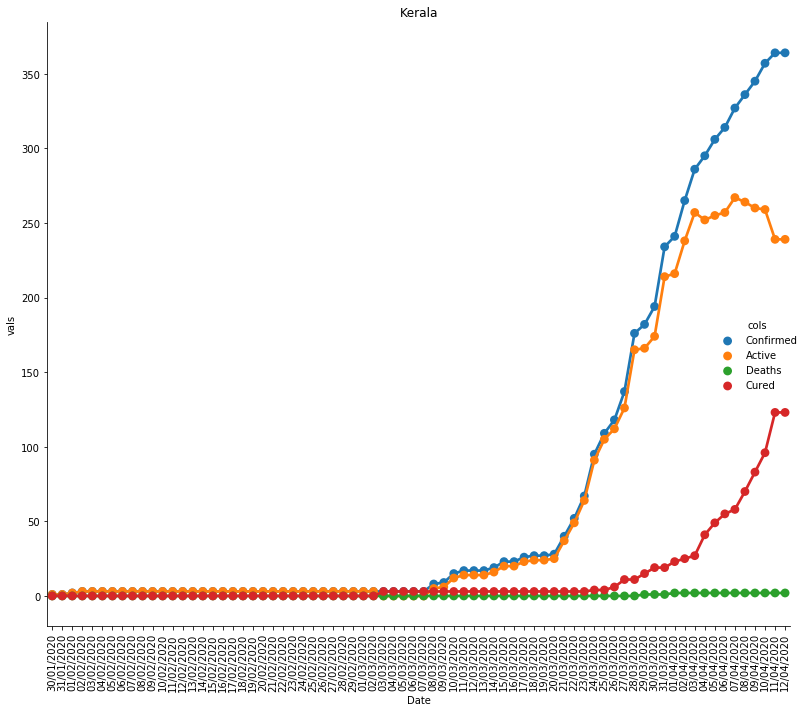

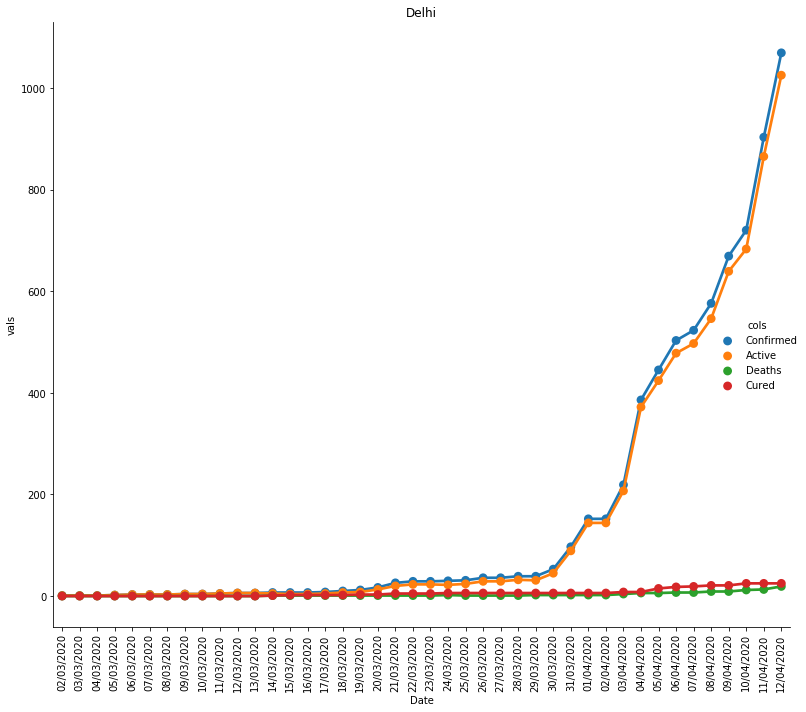

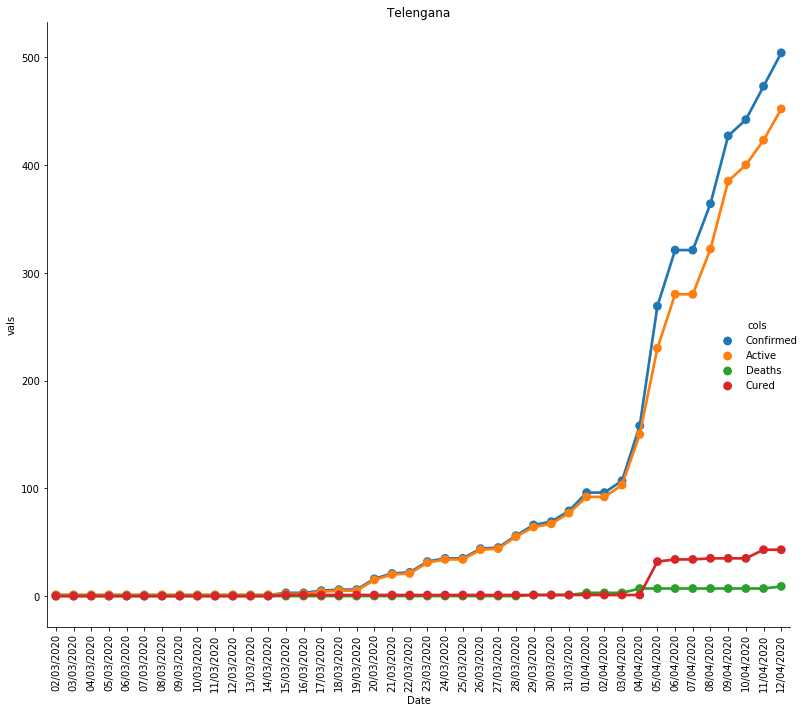

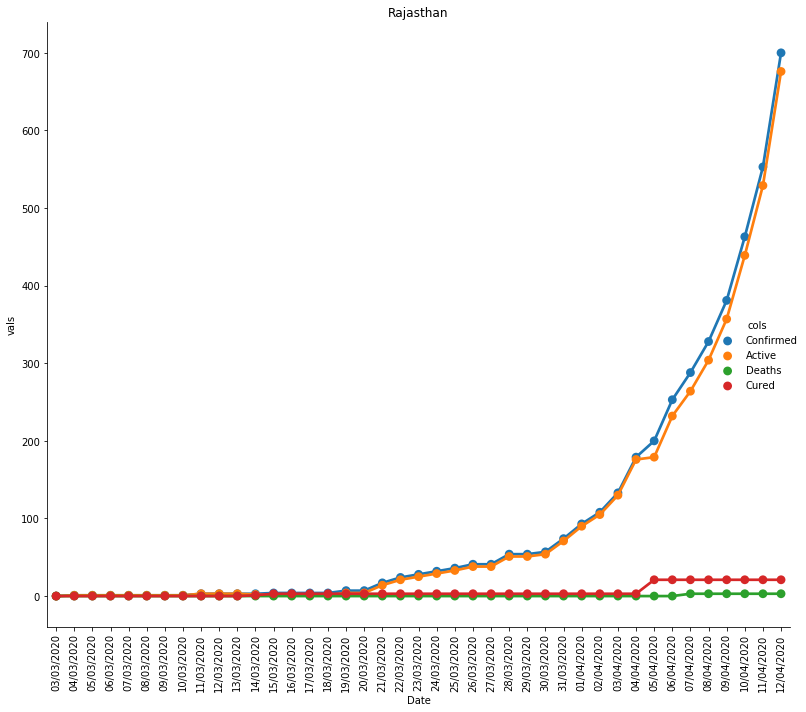

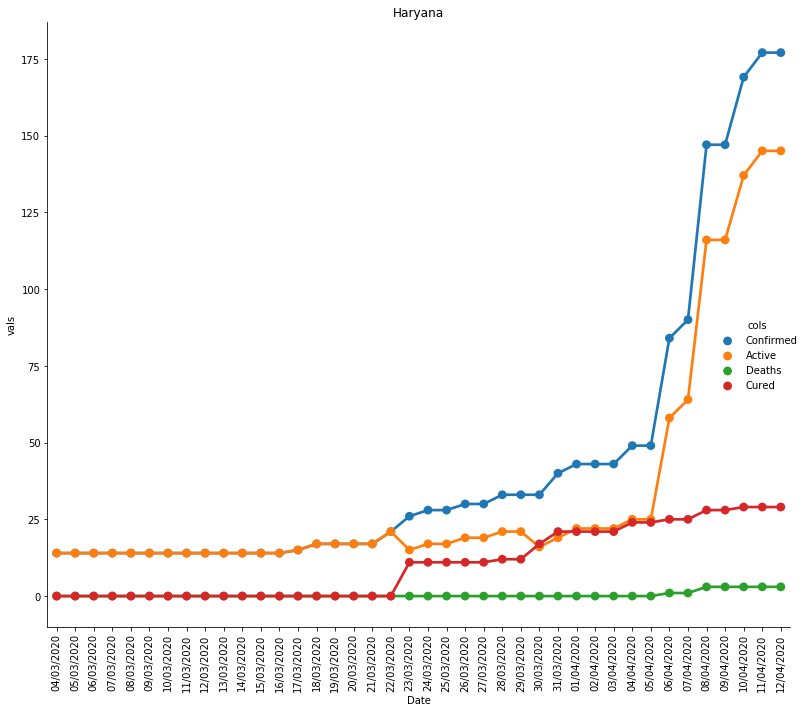

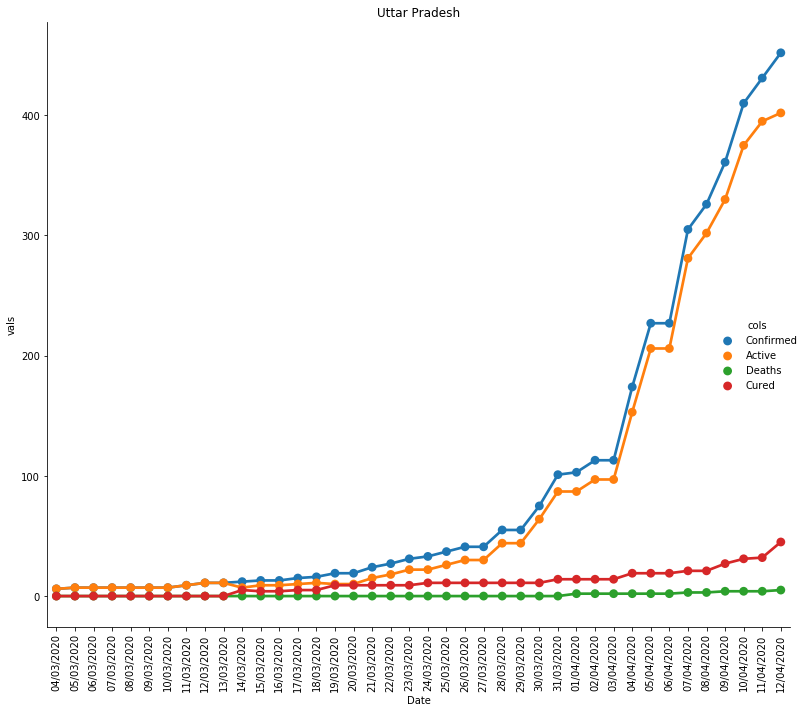

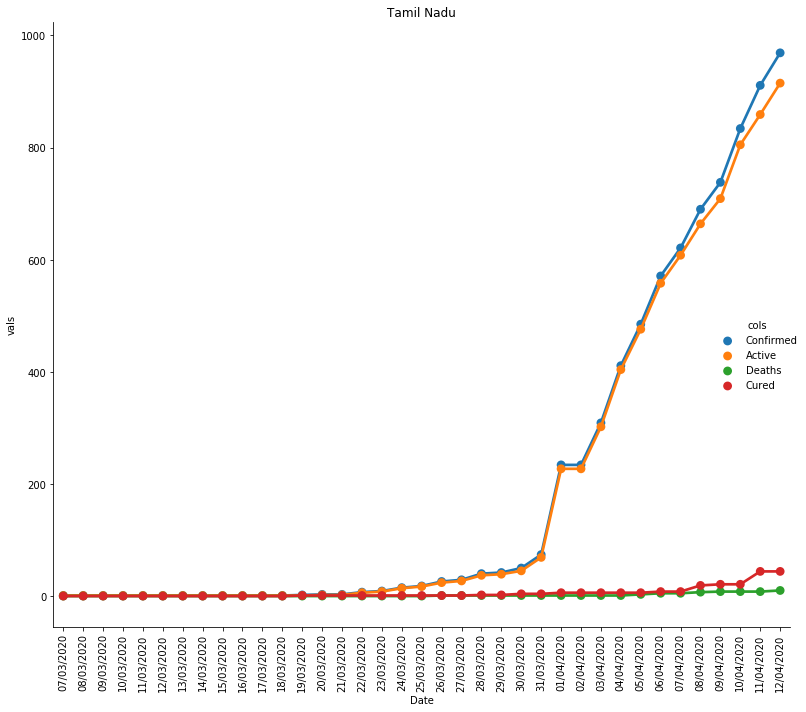

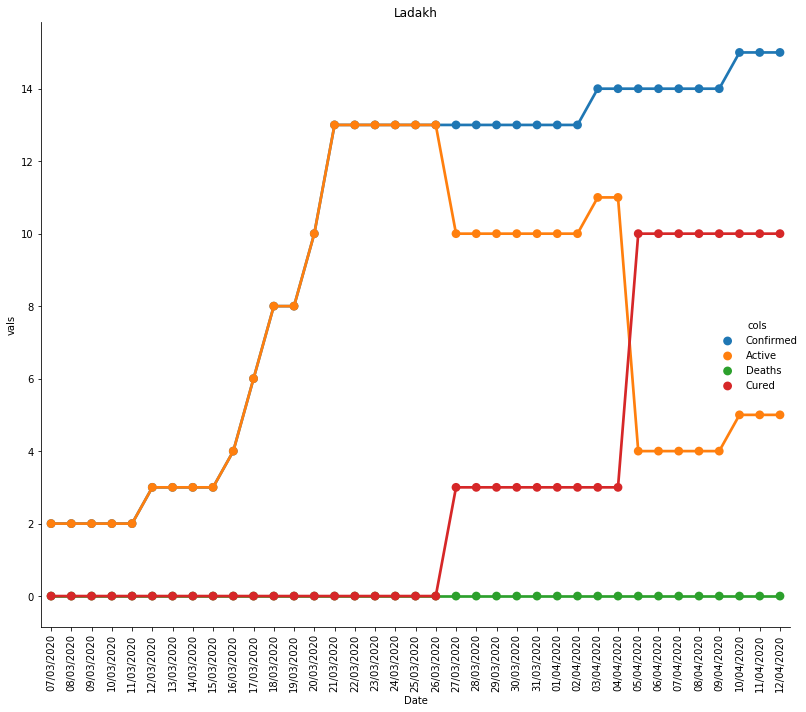

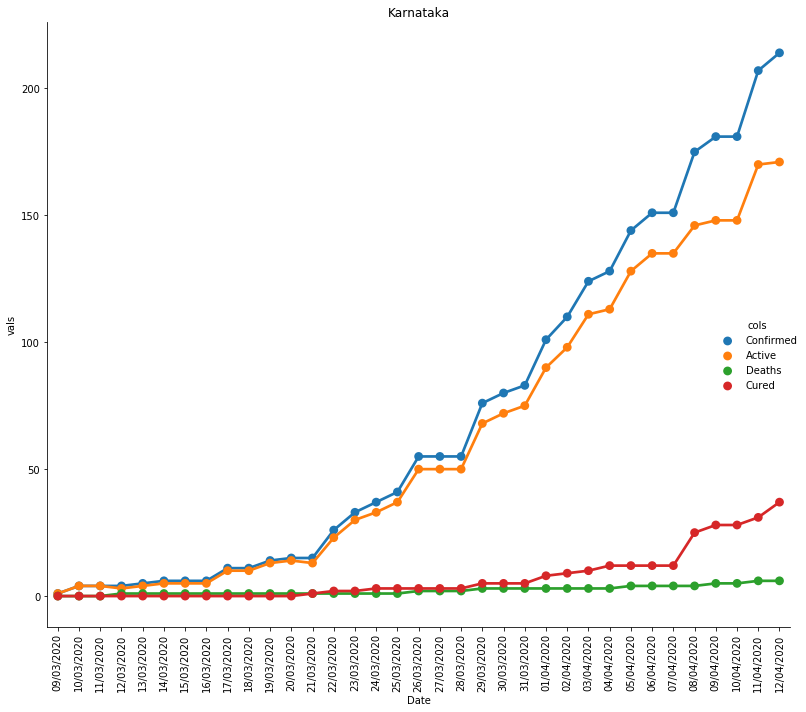

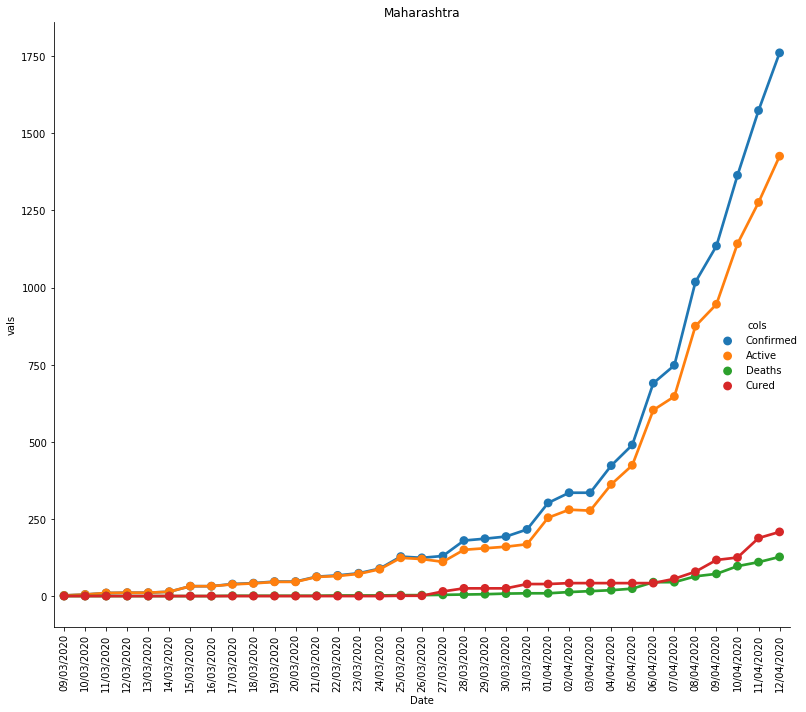

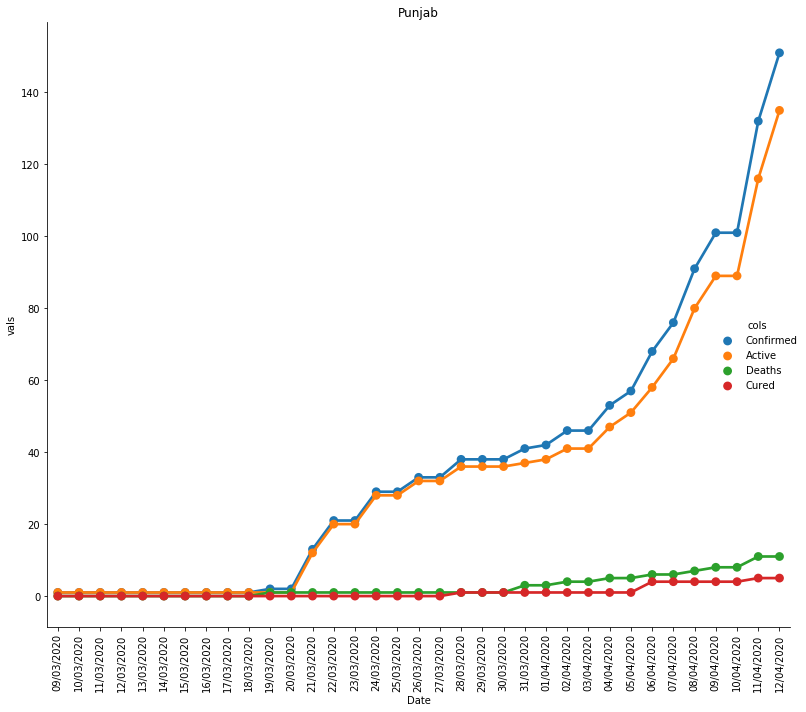

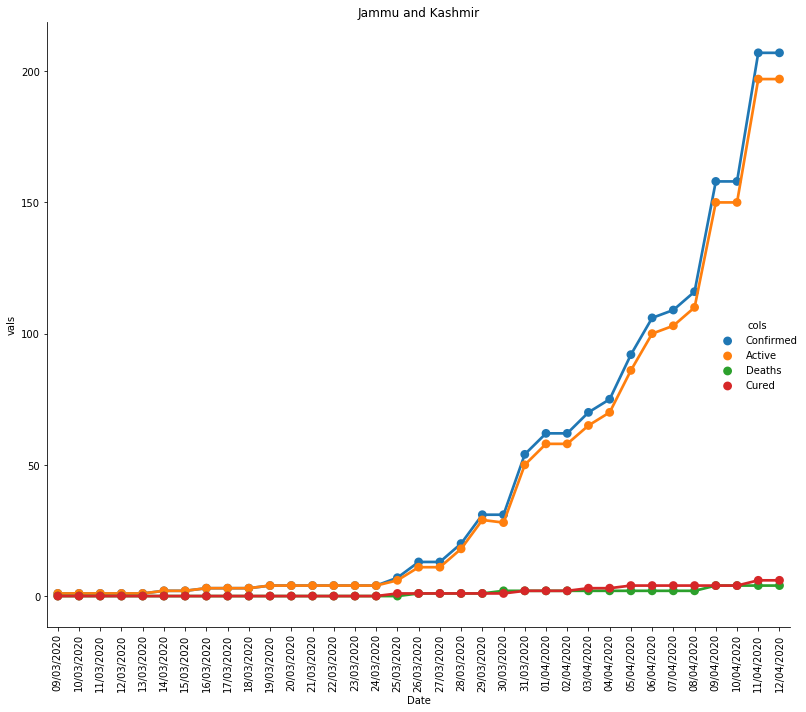

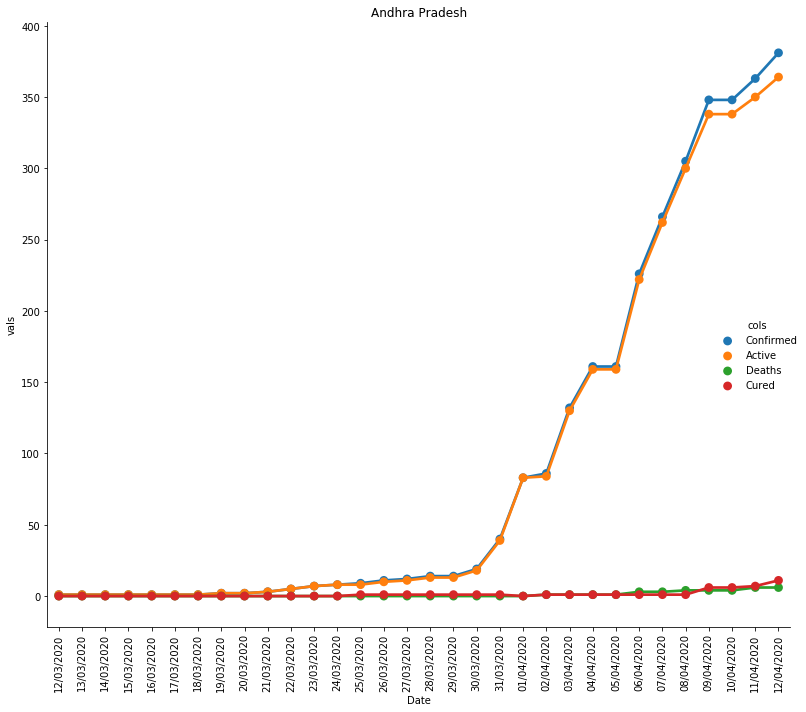

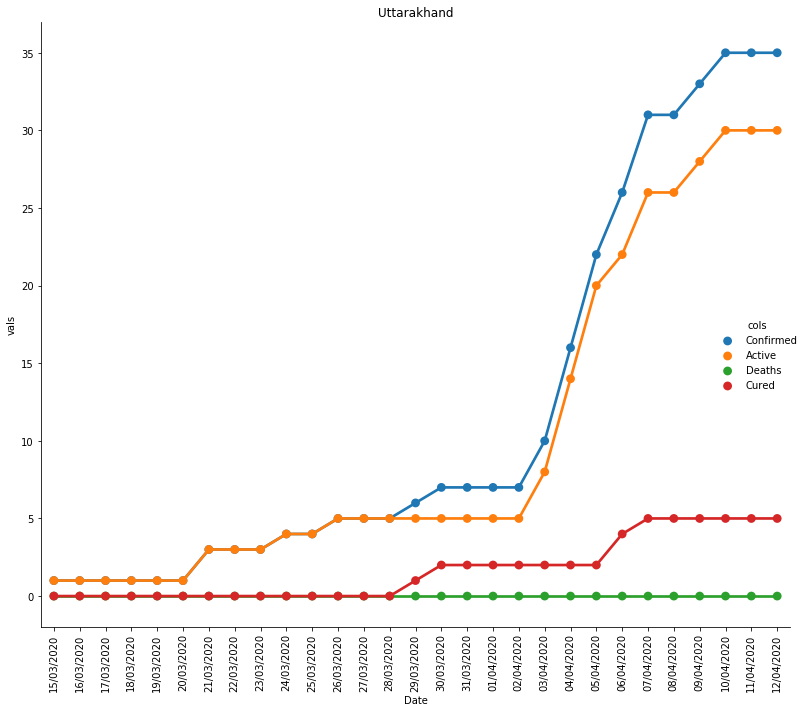

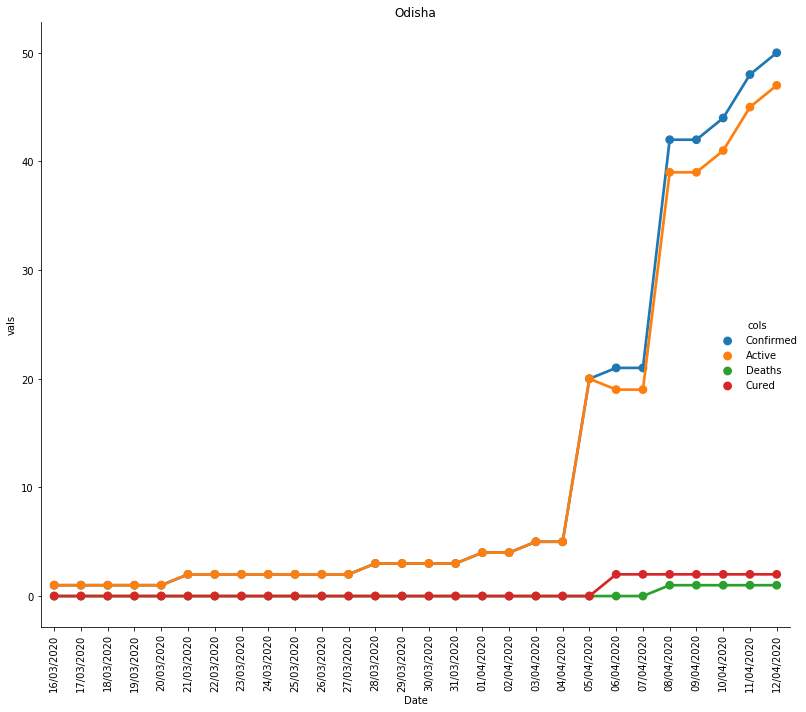

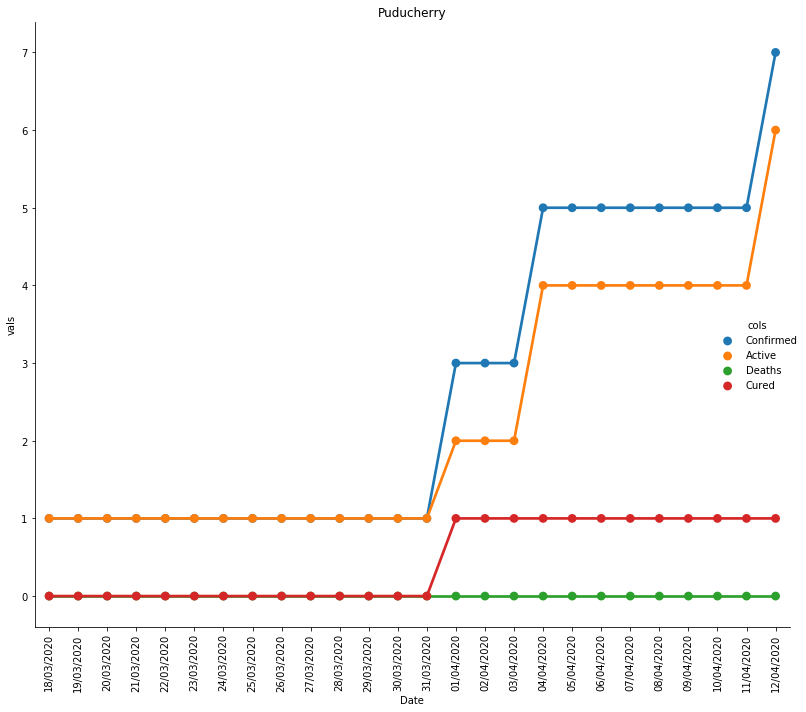

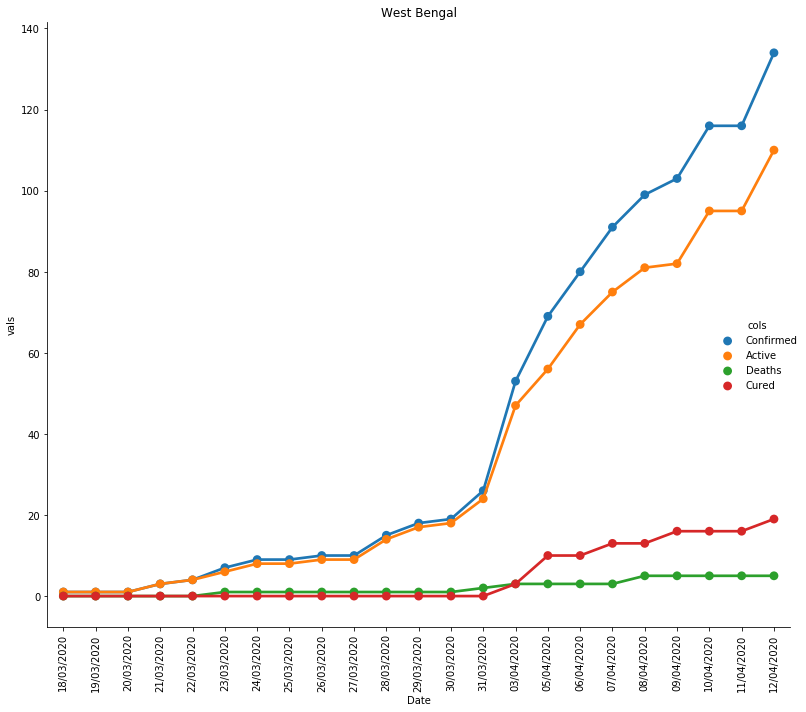

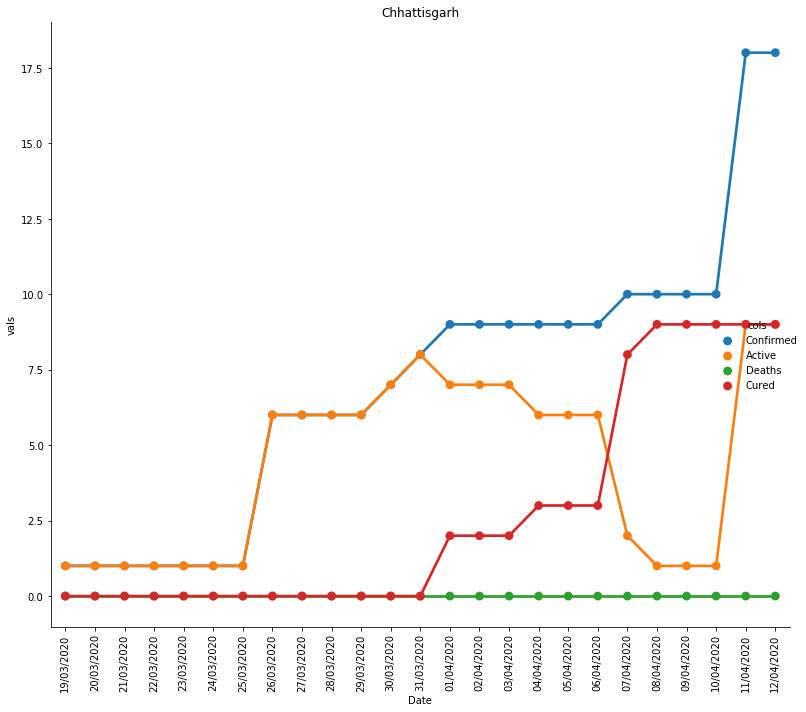

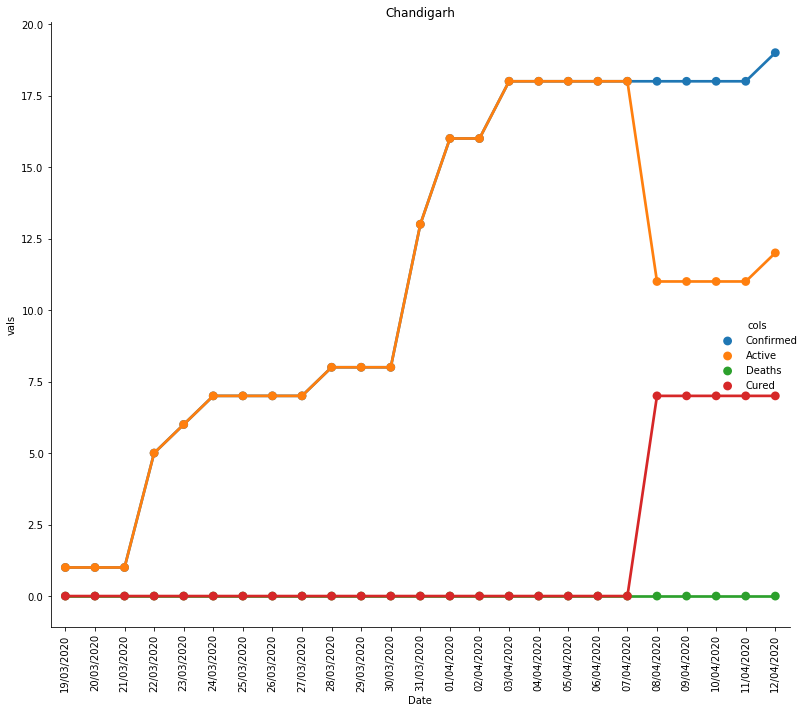

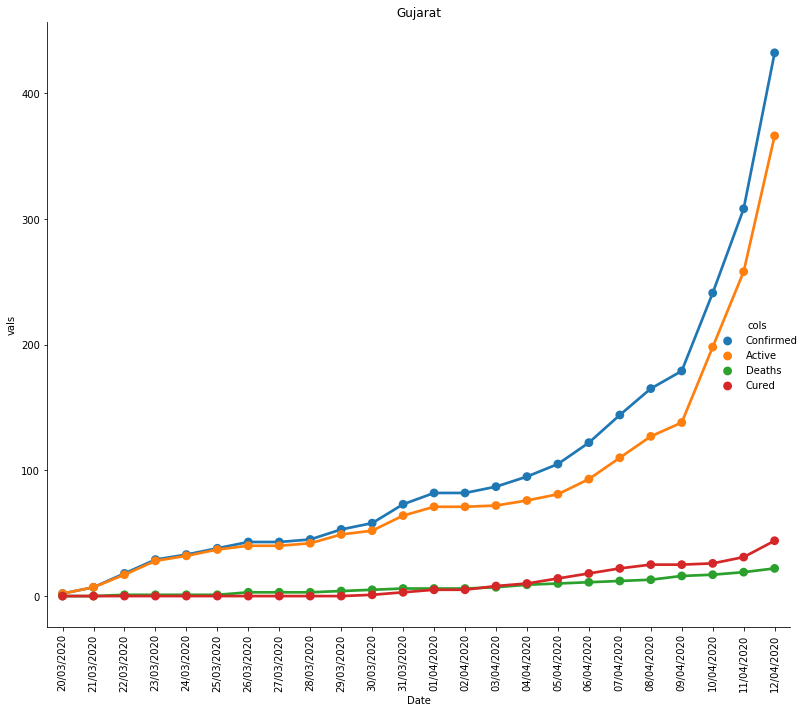

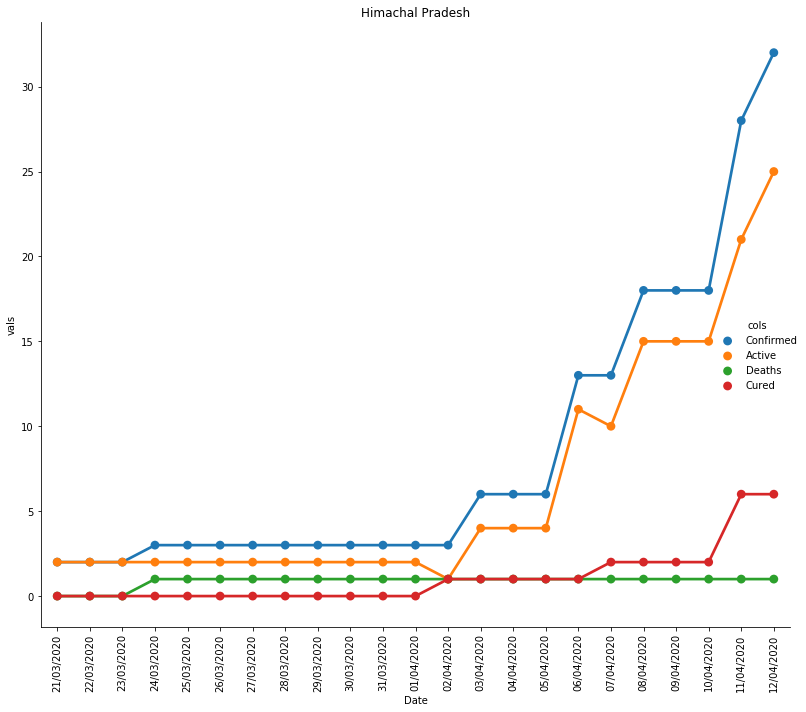

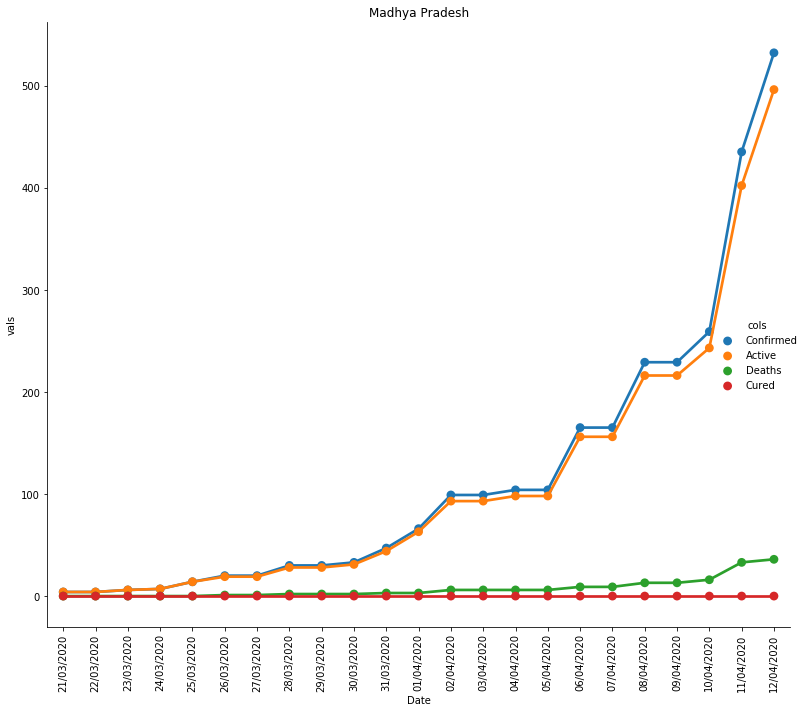

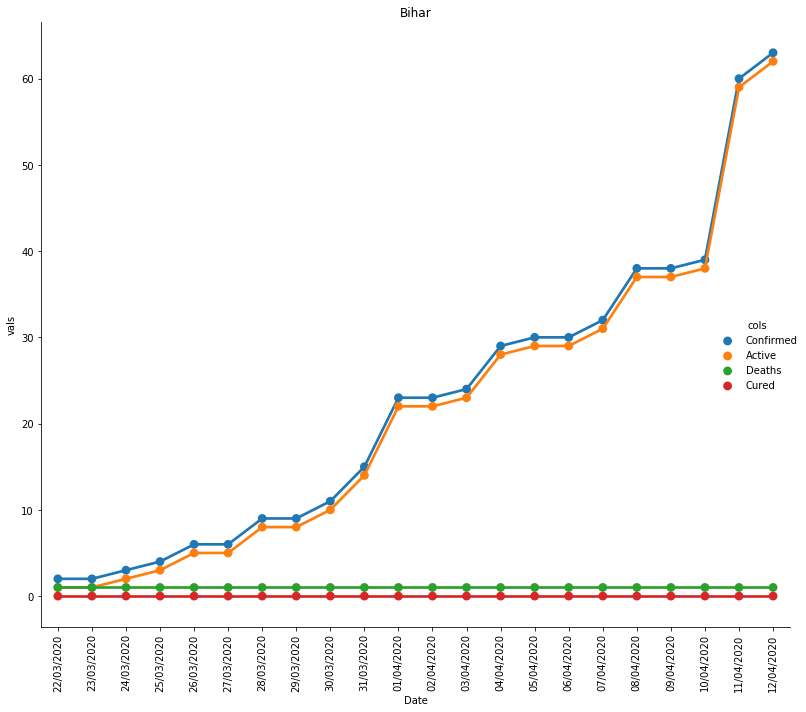

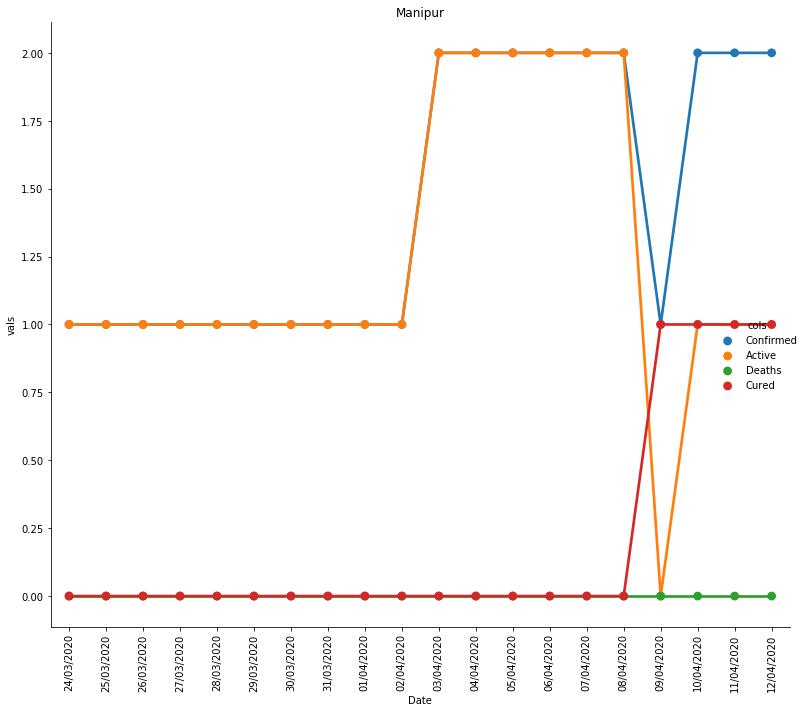

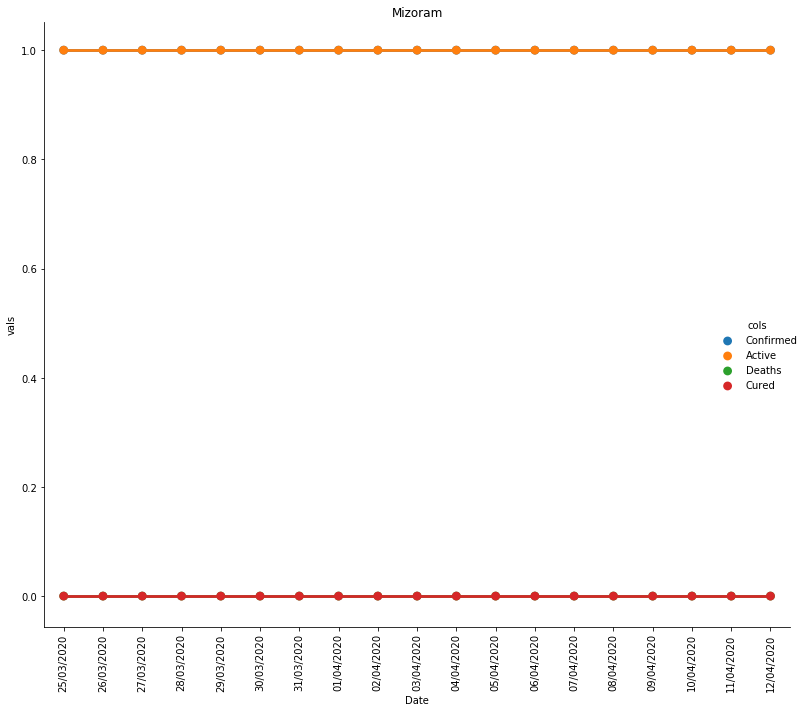

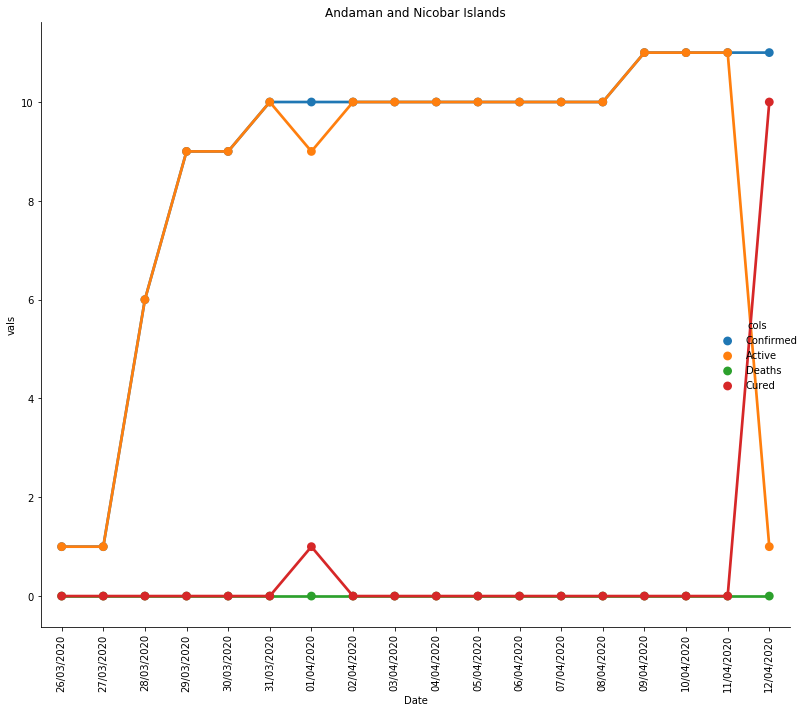

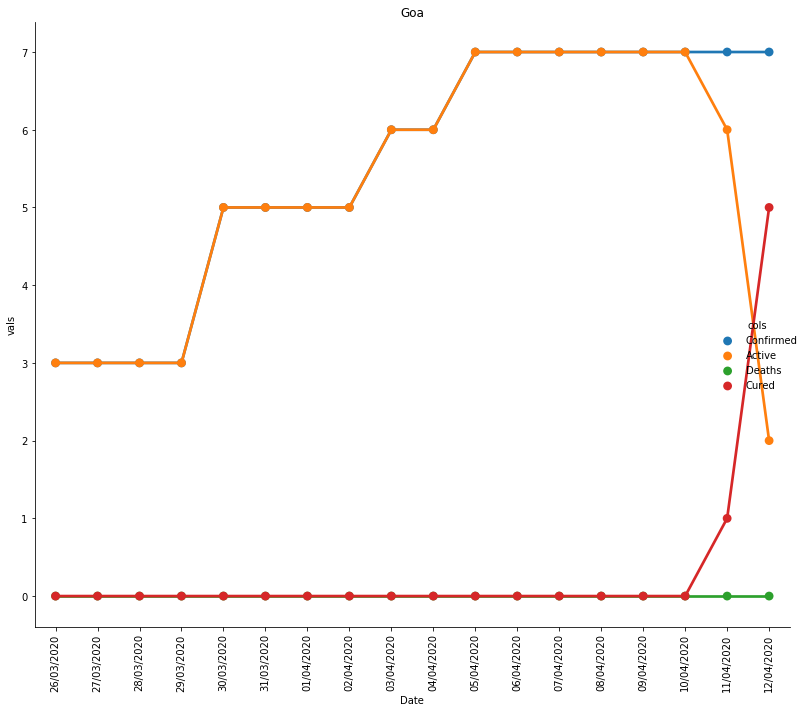

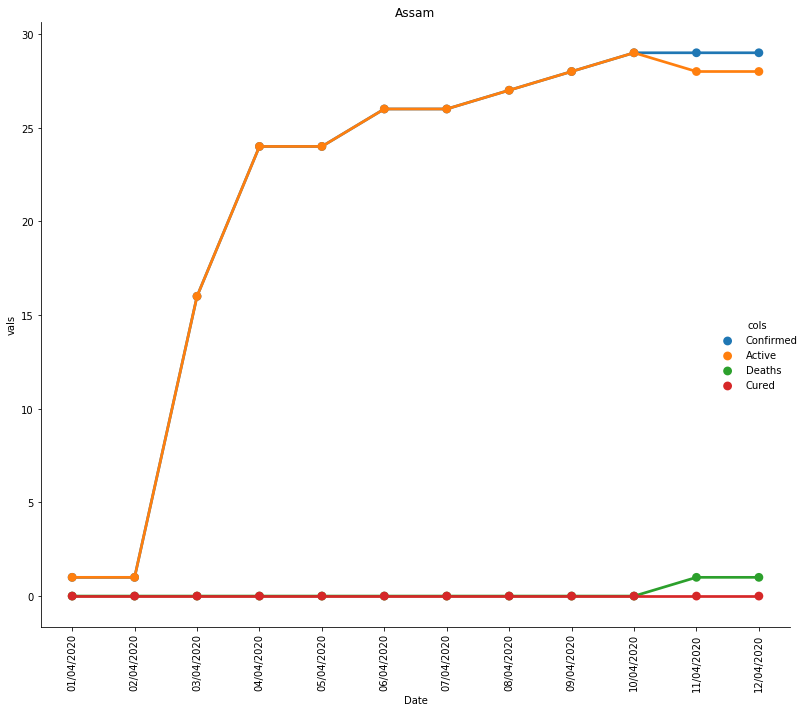

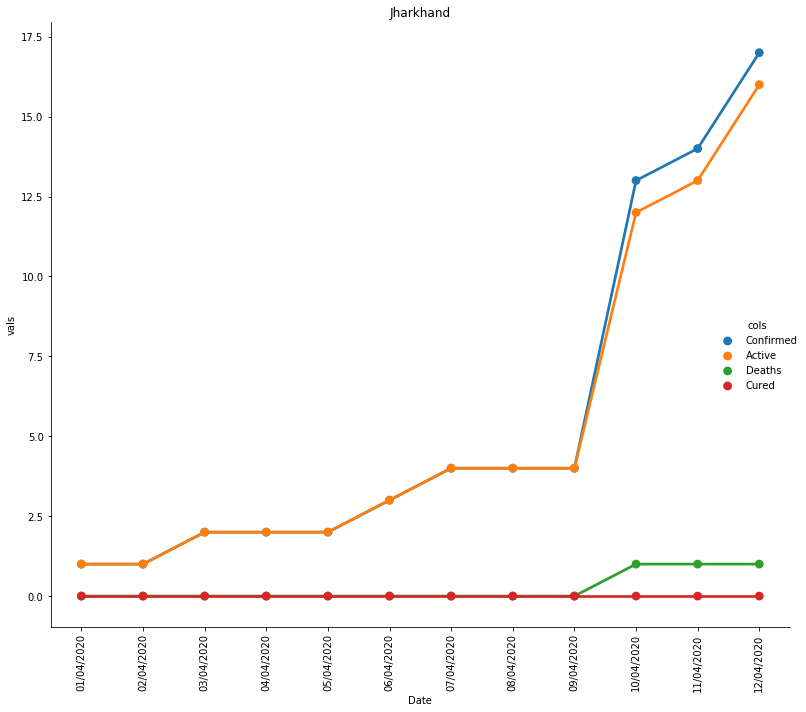

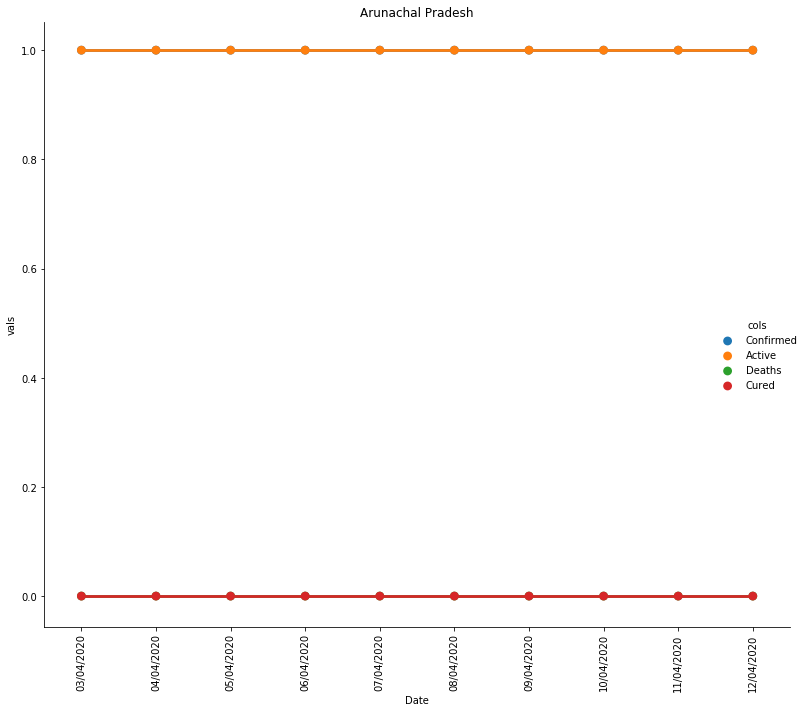

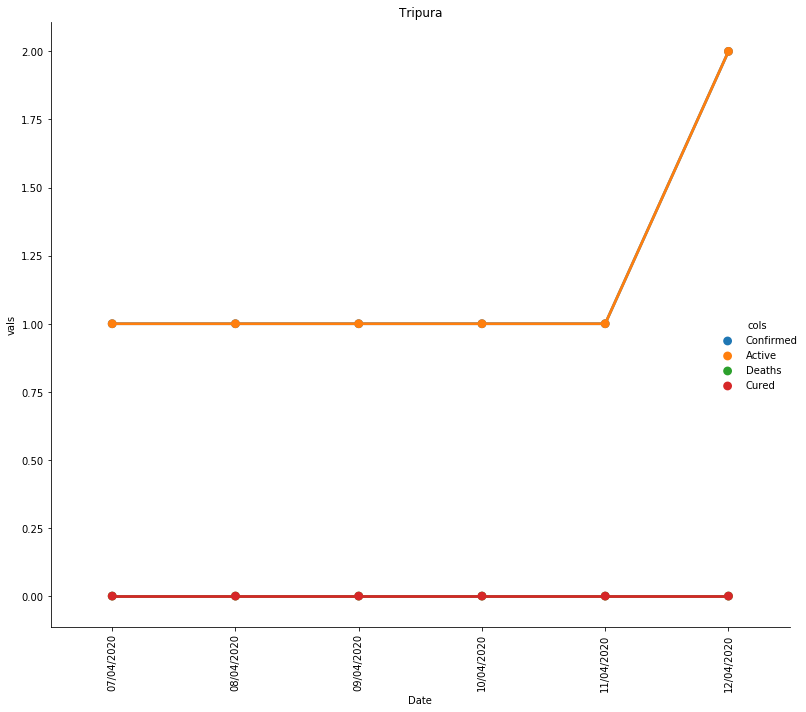

In [43]:
for state in states:
    covid_19_india_state_stats = covid_19_india_stats[covid_19_india_stats['State/UT'] == state]
    covid_19_india_state_stats.drop('State/UT',axis=1, inplace=True)
    covid_19_india_state_stats.head()
    covid_19_india_state_stats = covid_19_india_state_stats.melt('Date', var_name='cols',  value_name='vals')
    g = sns.catplot(x="Date", y="vals", hue='cols', data=covid_19_india_state_stats,height =10,kind='point')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.tight_layout()
    plt.savefig('images/'+str(state)+'-covid-stats.png')

# Covid rates by states

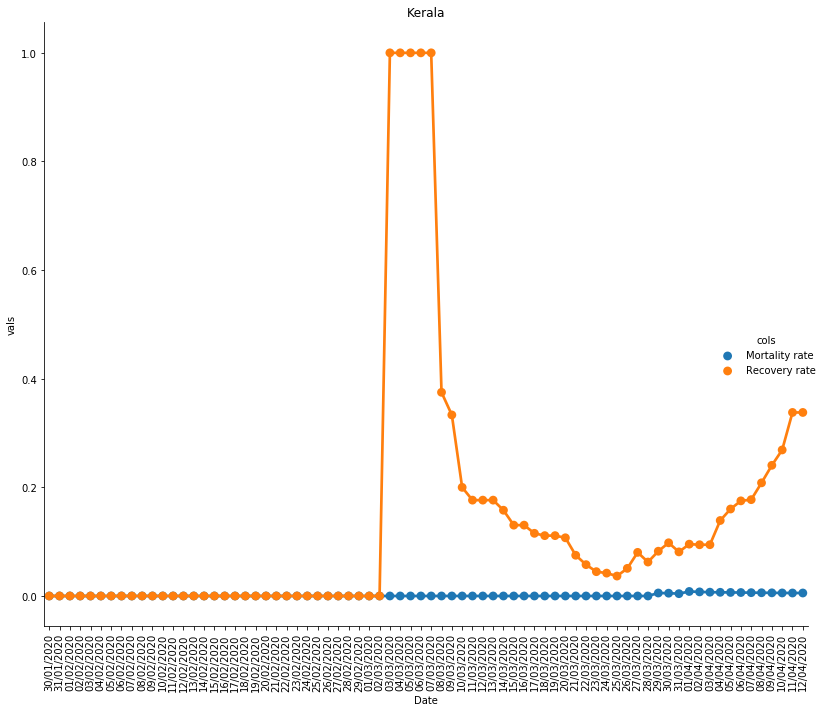

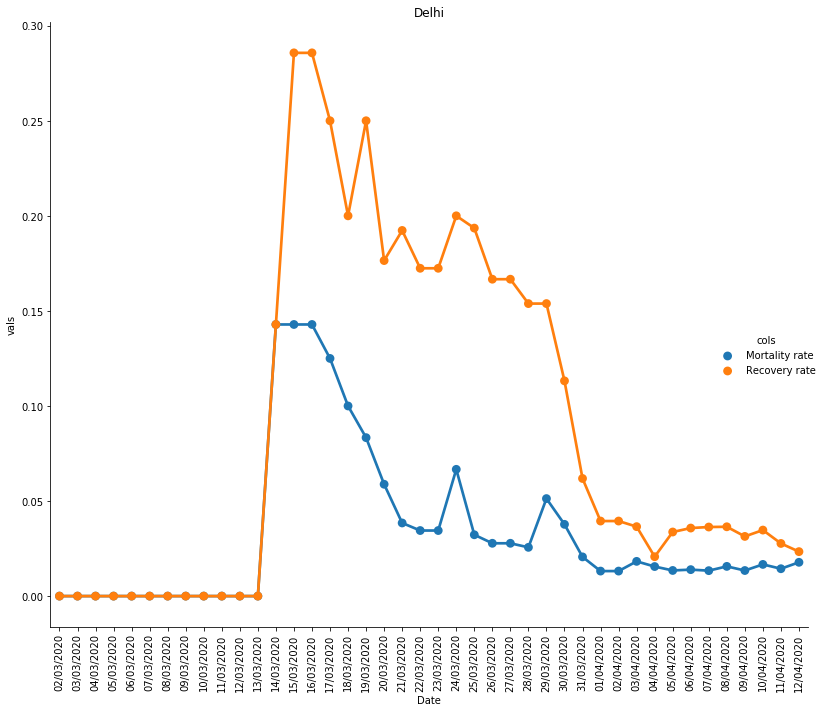

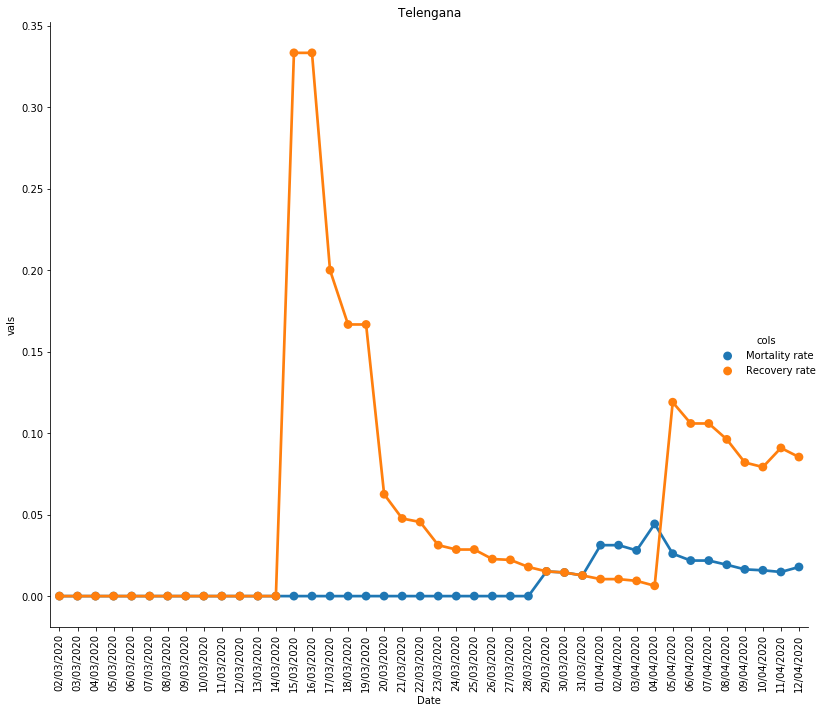

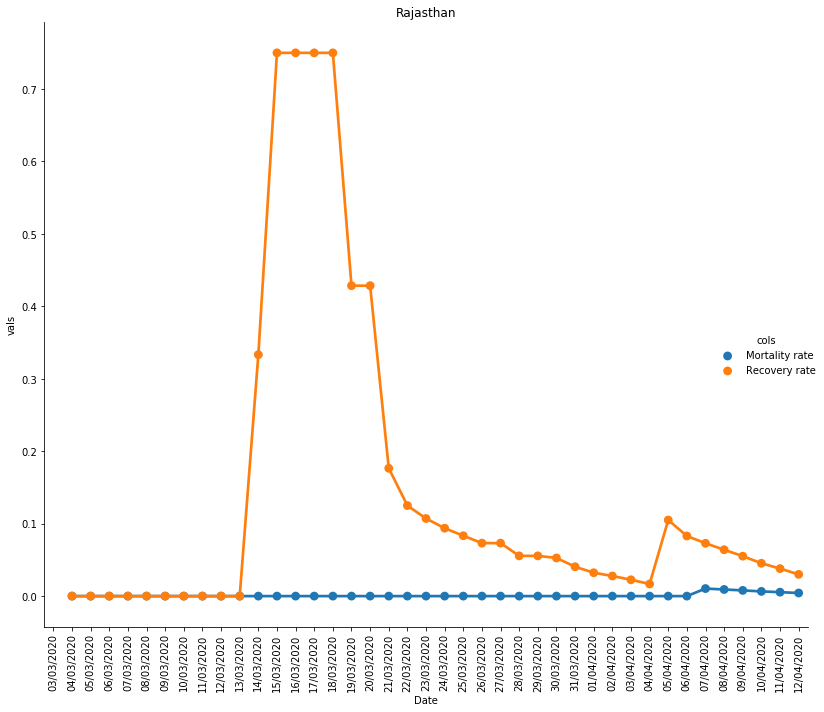

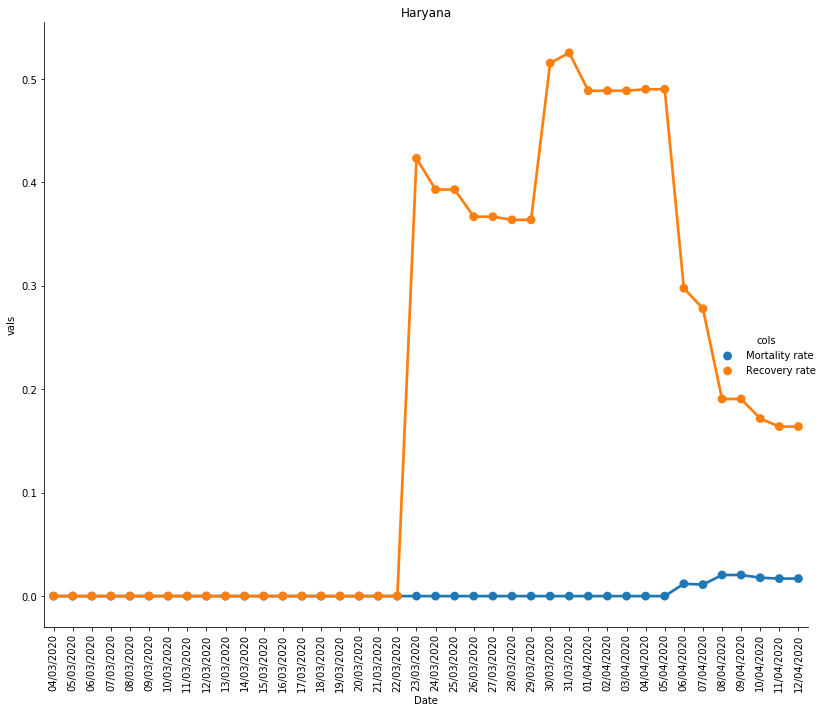

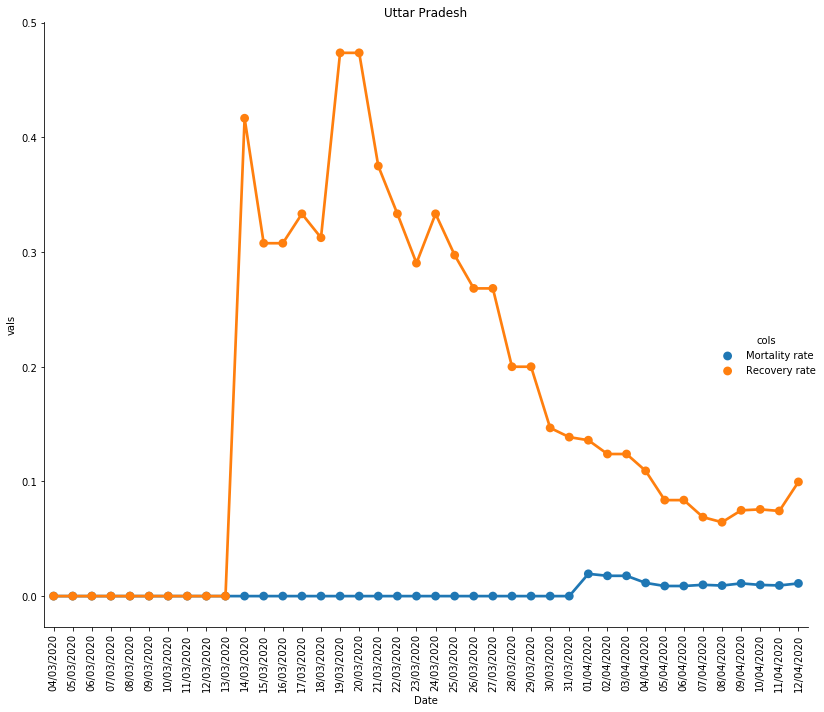

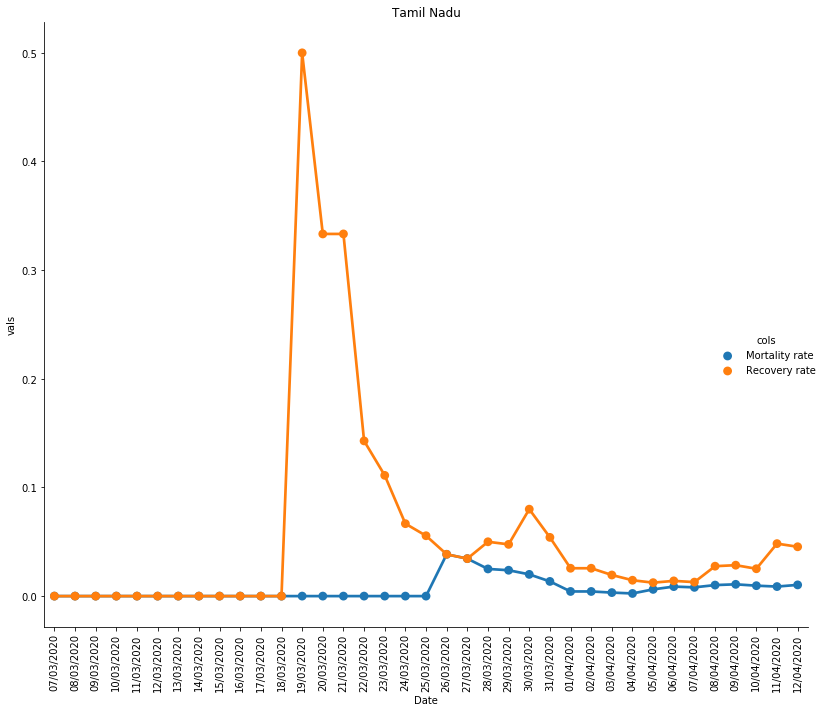

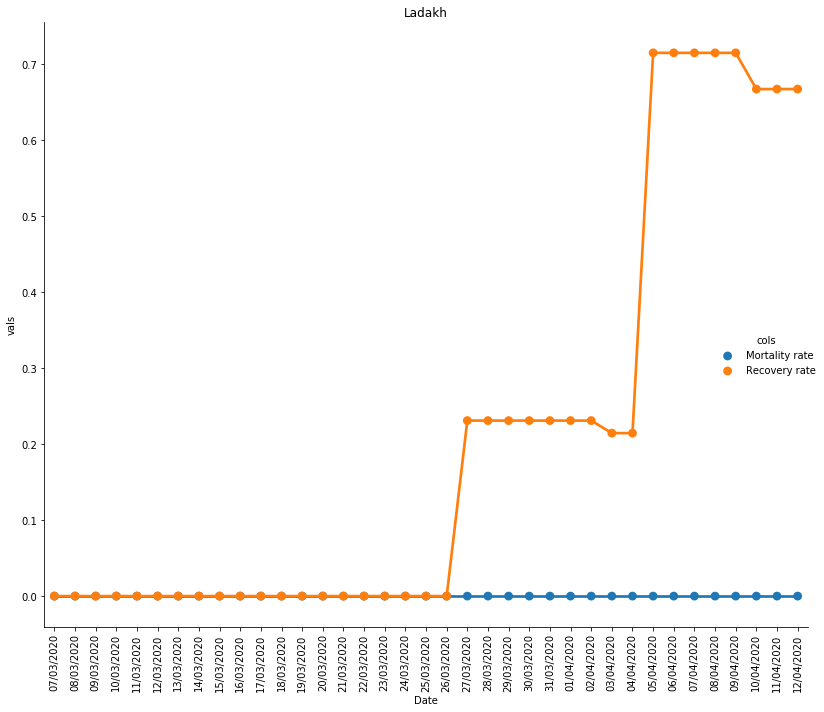

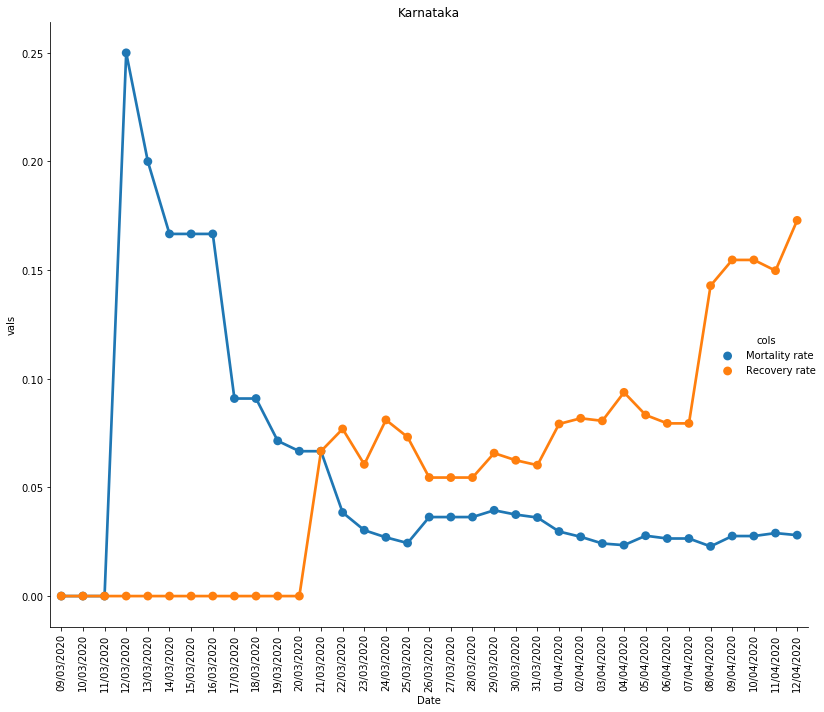

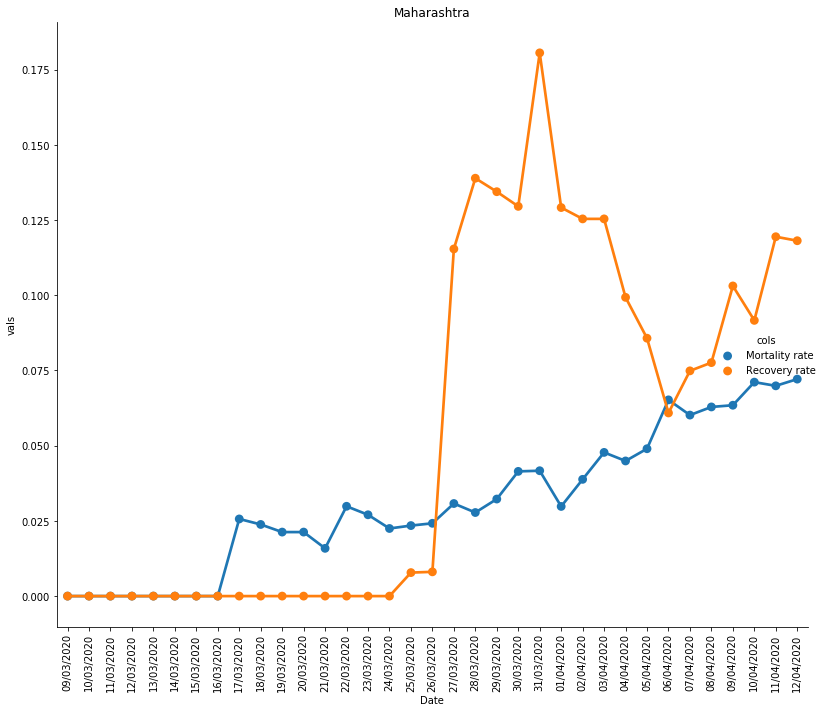

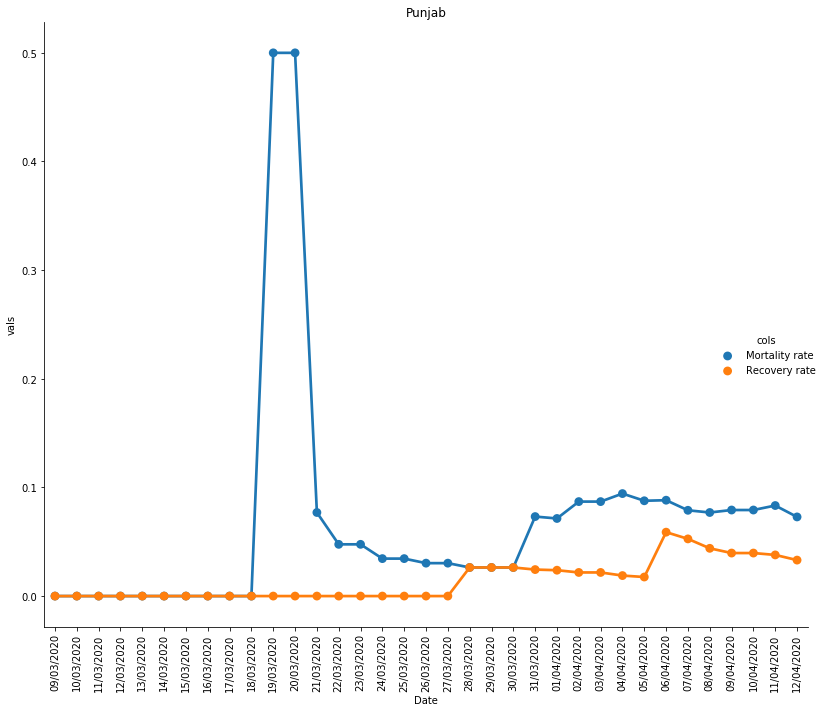

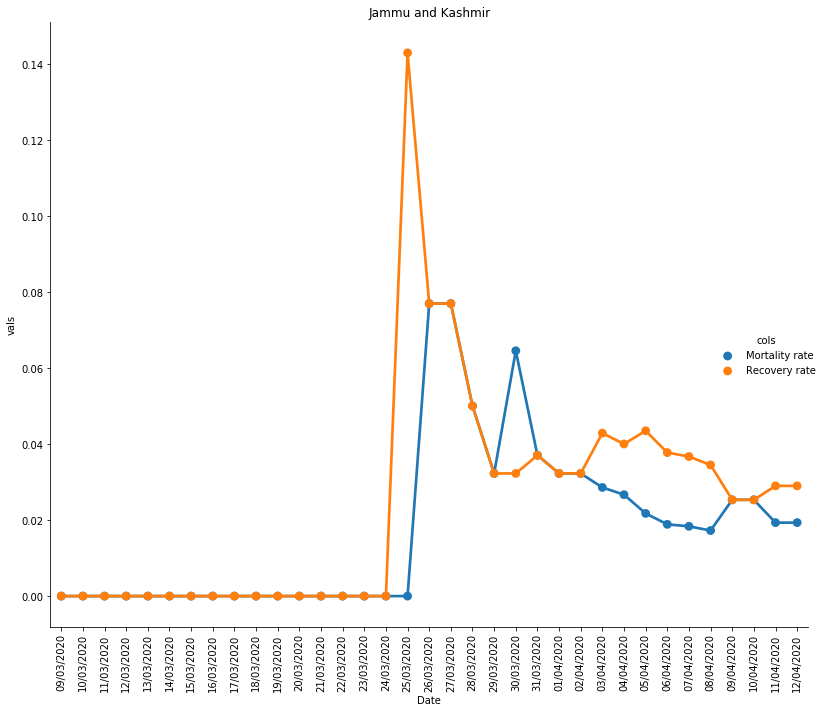

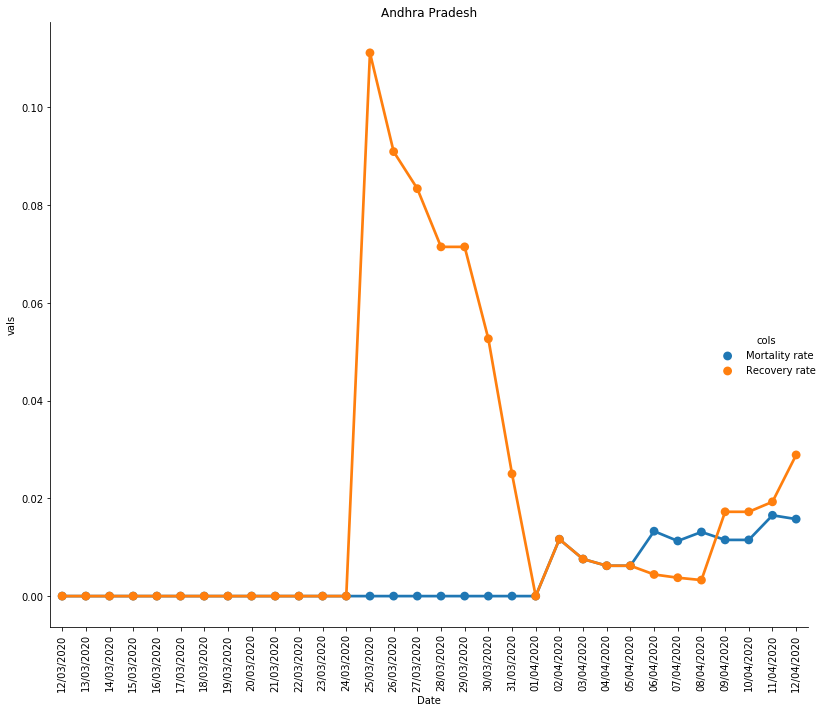

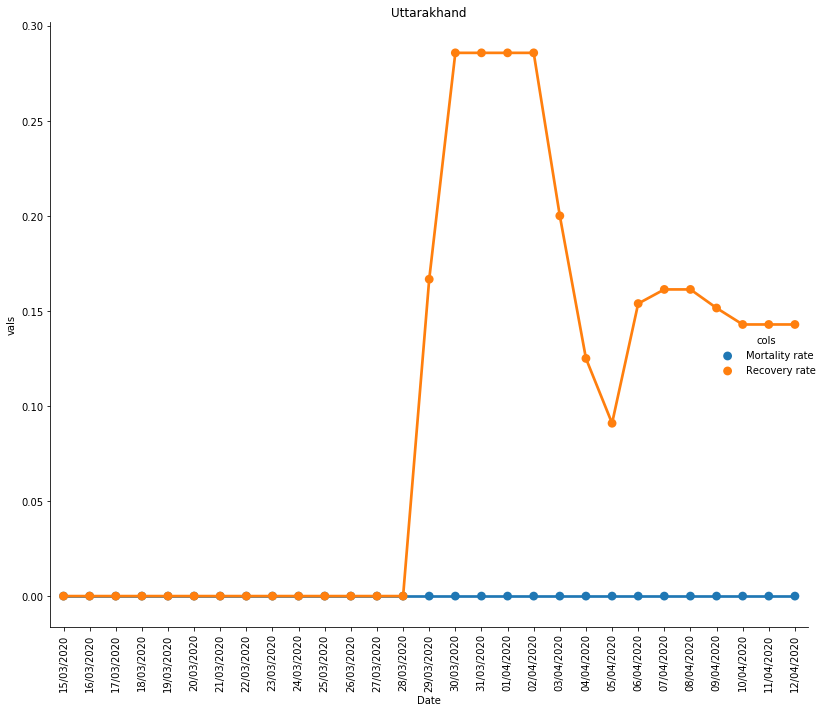

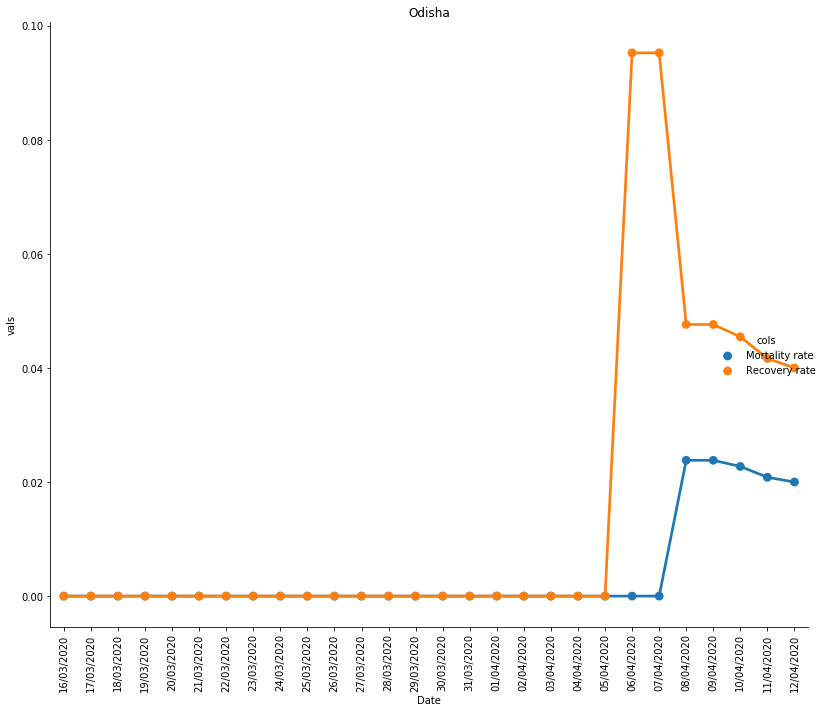

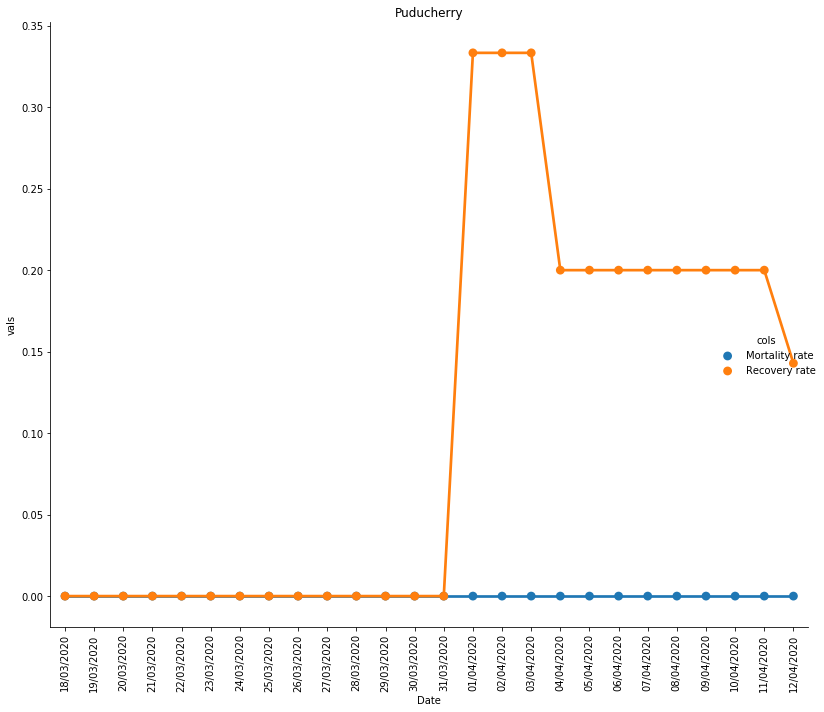

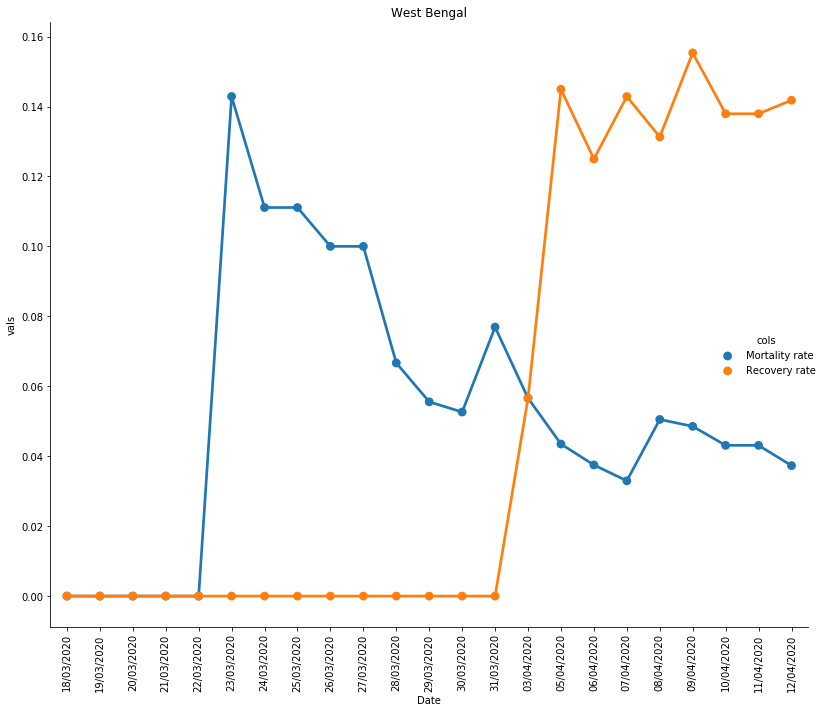

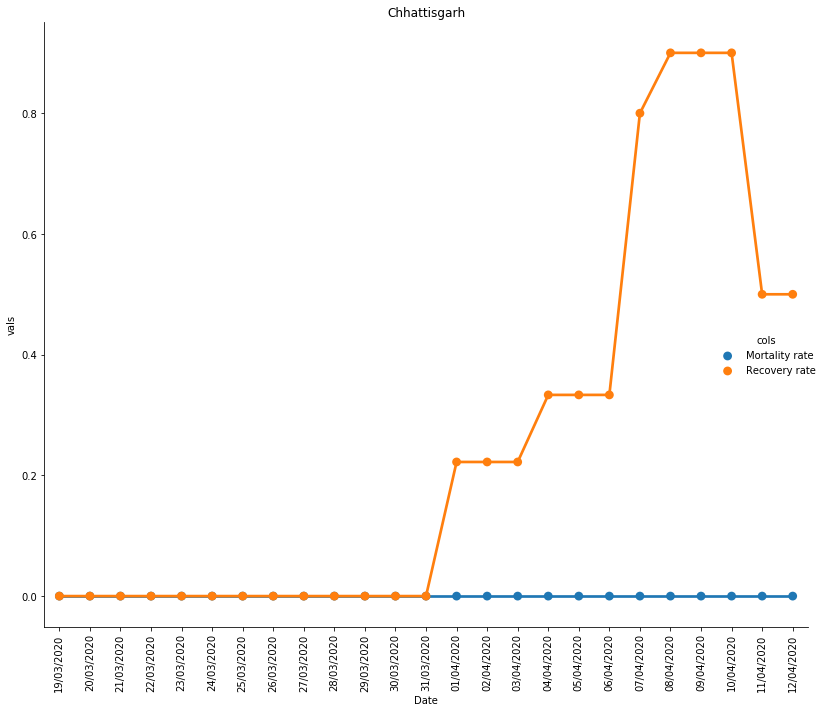

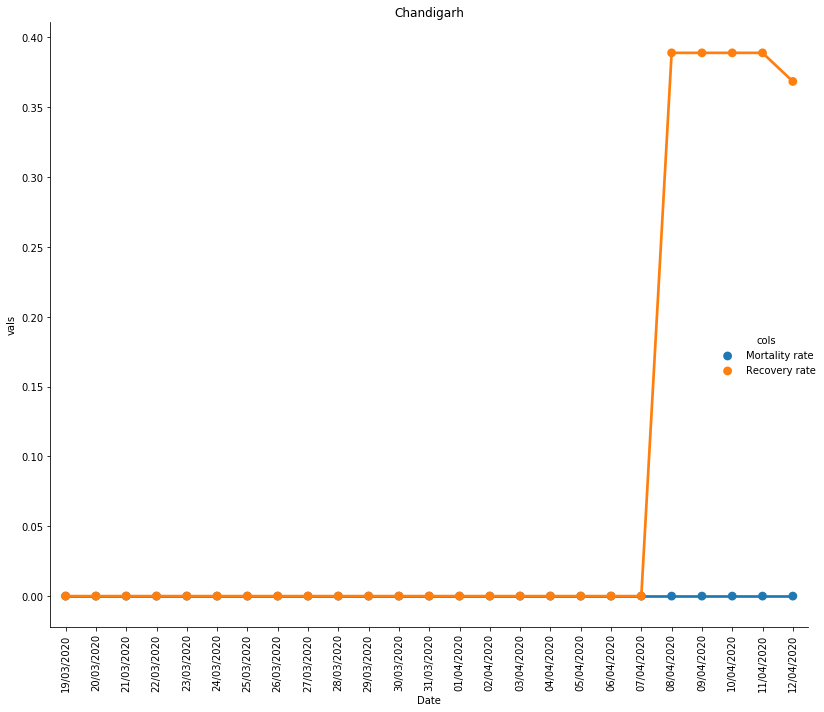

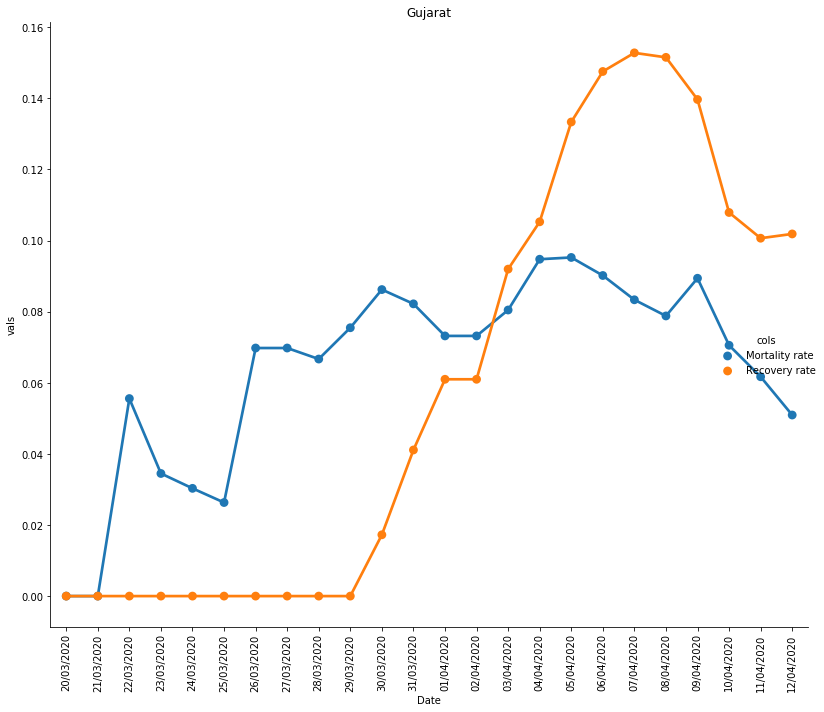

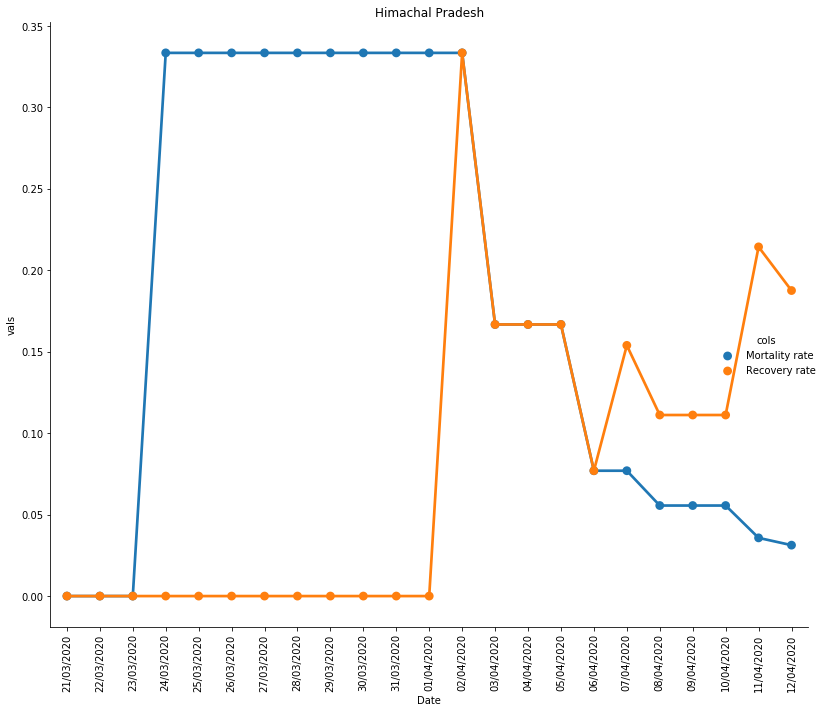

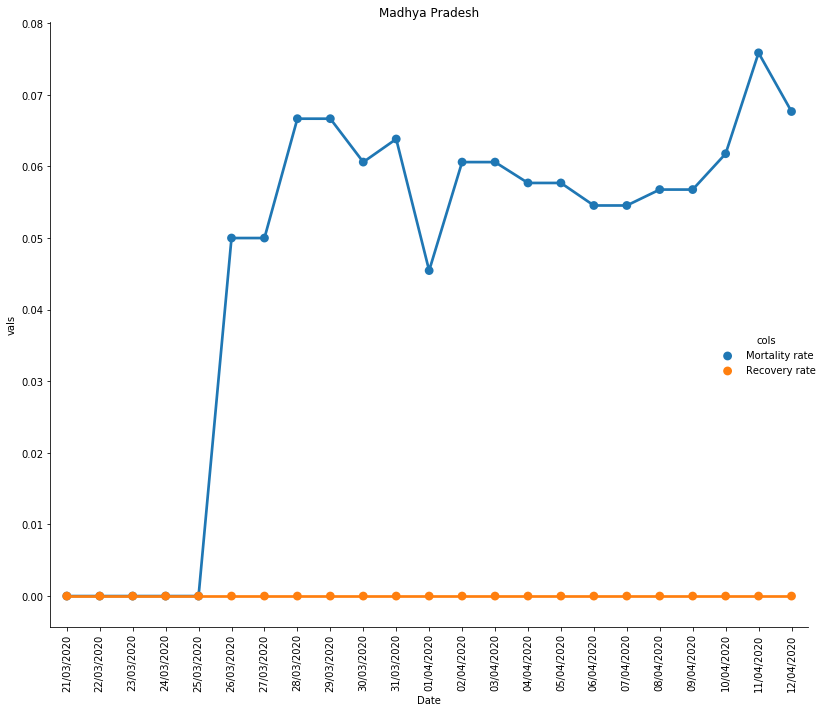

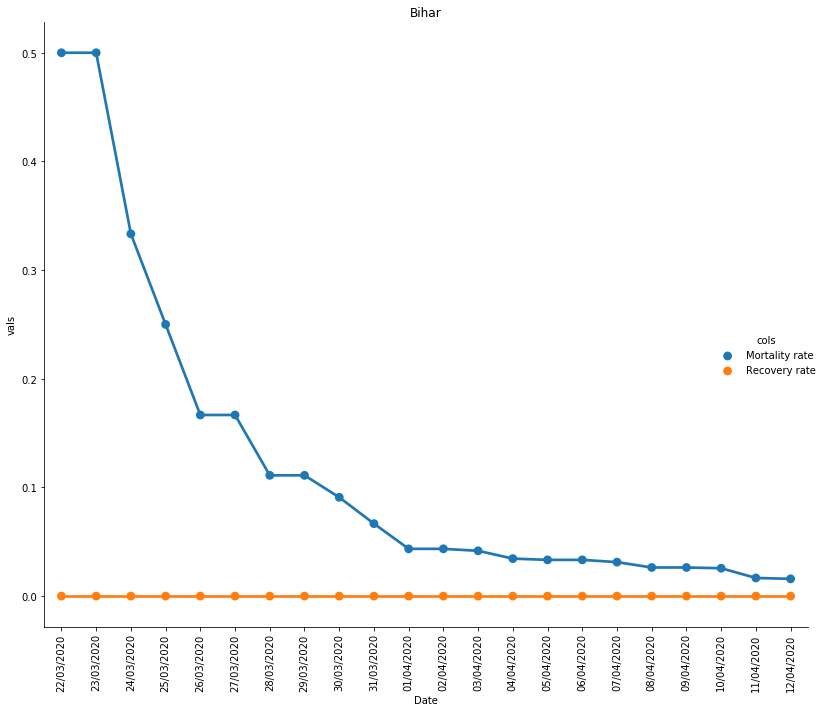

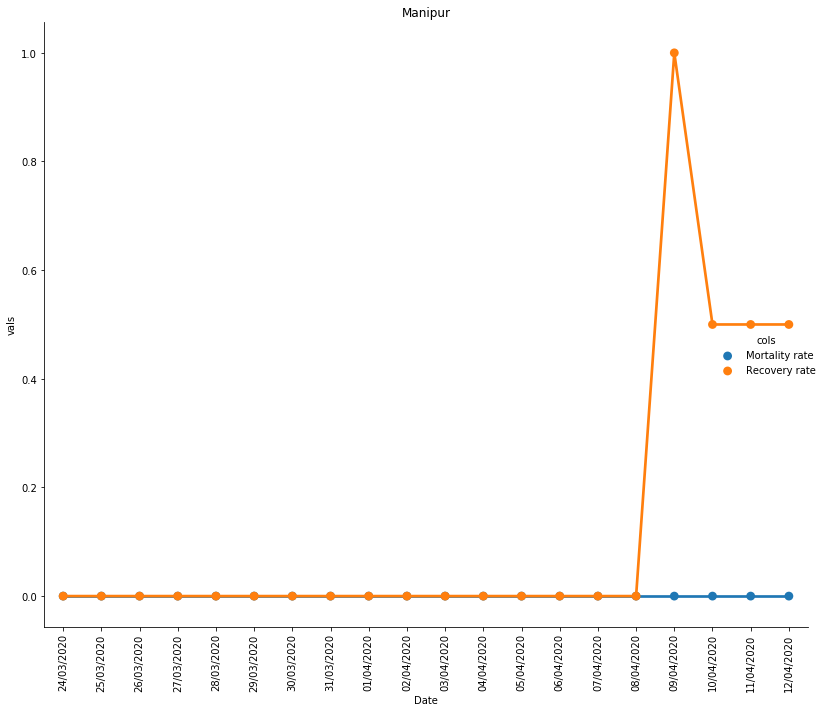

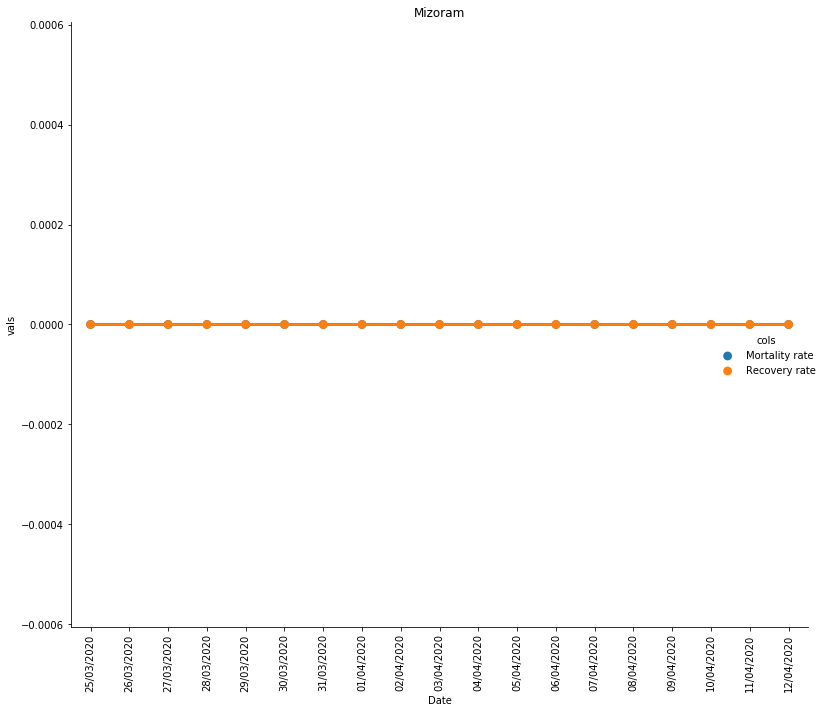

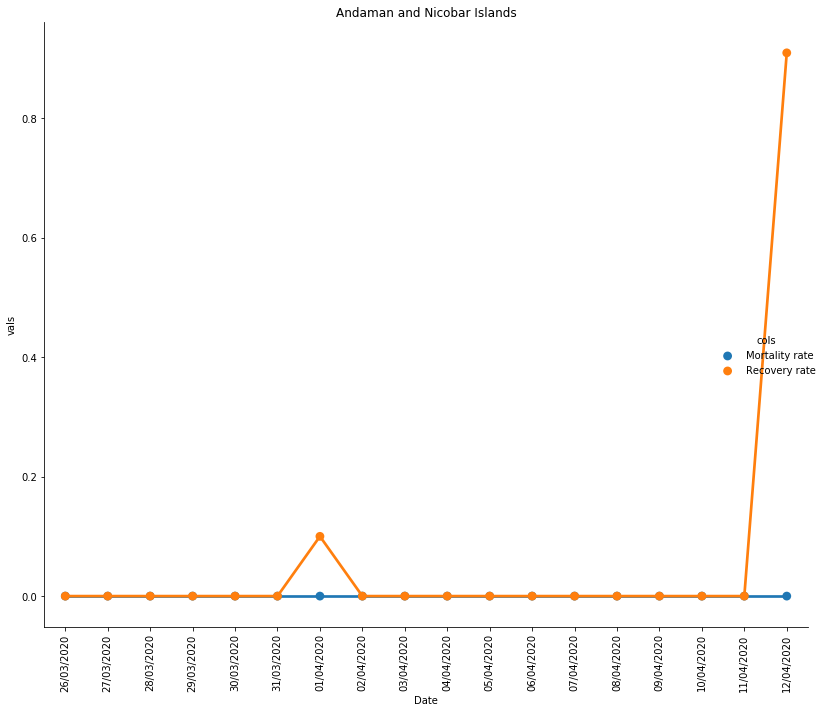

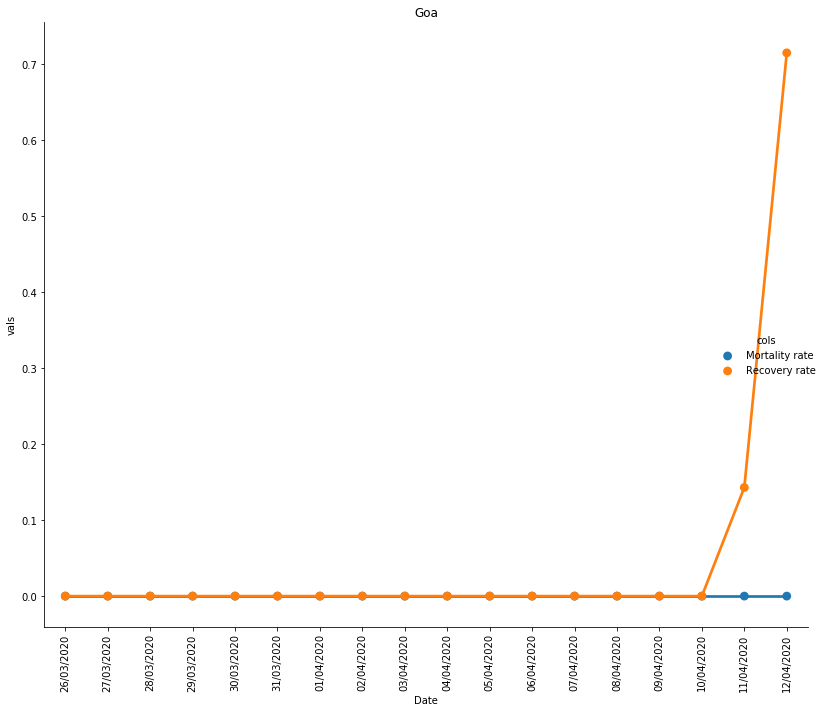

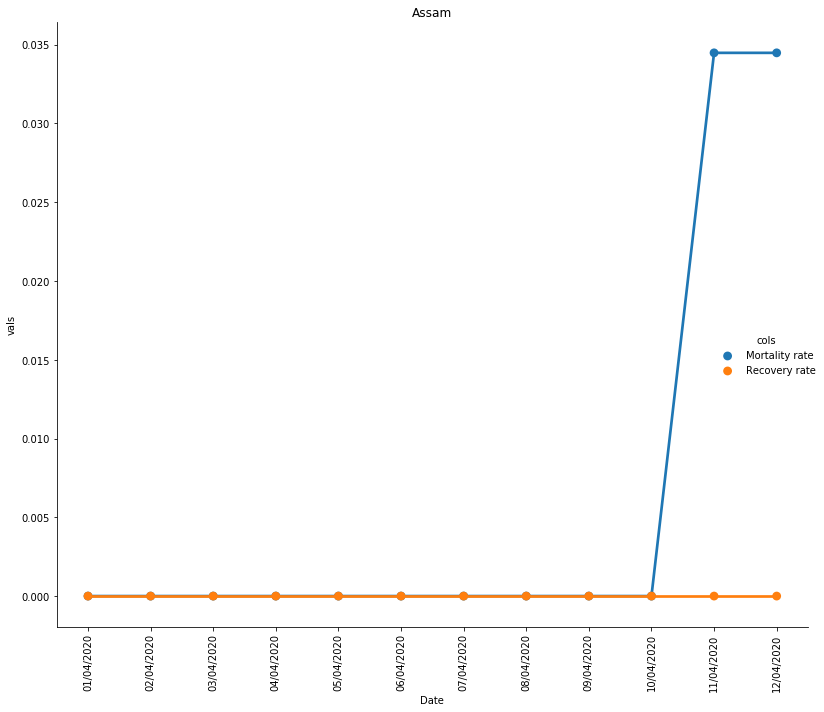

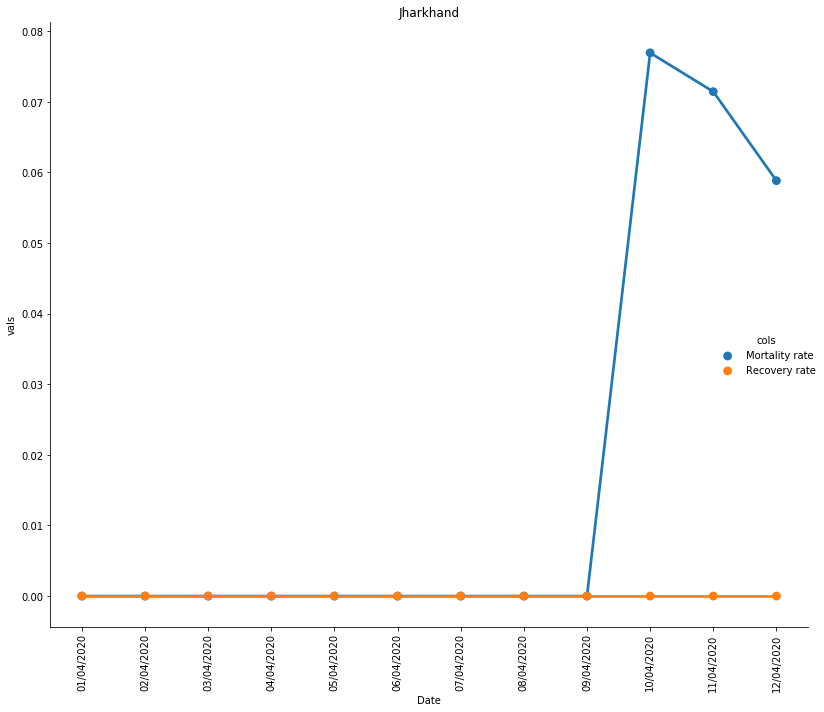

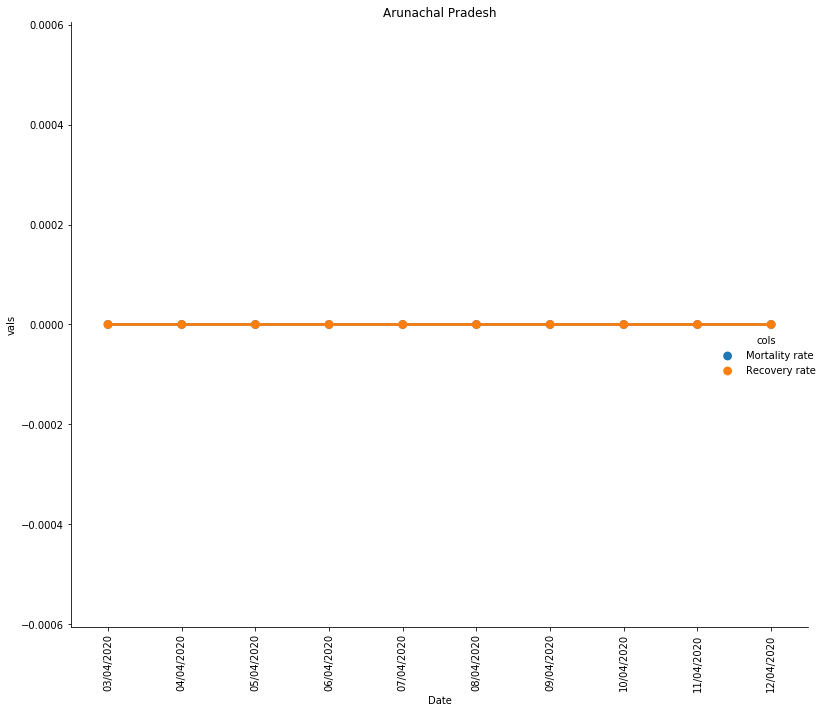

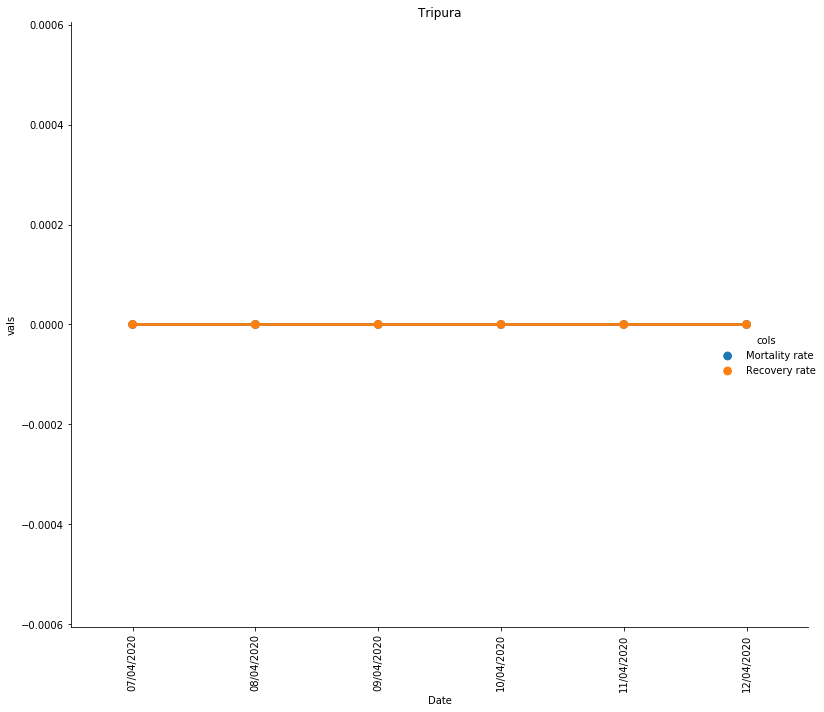

In [20]:
for state in states:
    covid_19_india_state_rates = covid_19_india_rates[covid_19_india_rates['State/UT'] == state]
    covid_19_india_state_rates.drop('State/UT',axis=1, inplace=True)
    covid_19_india_state_rates.head()
    covid_19_india_state_rates = covid_19_india_state_rates.melt('Date', var_name='cols',  value_name='vals')
    g = sns.catplot(x="Date", y="vals", hue='cols', data=covid_19_india_state_rates,height =10,kind='point')
    plt.xticks(rotation=90)
    plt.title(state)
    plt.tight_layout()
    plt.savefig('images/'+str(state)+'-covid-rates.png')

In [38]:
current_covid_stats = covid_19_india.groupby(by='State/UT').last()
current_covid_stats.reset_index(inplace=True)
current_covid_stats_sorted_conf = current_covid_stats.sort_values(by='Confirmed',ascending=False)
current_covid_stats_sorted_active = current_covid_stats.sort_values(by='Active',ascending=False)
current_covid_stats_sorted_deaths = current_covid_stats.sort_values(by='Deaths',ascending=False)
current_covid_stats_sorted_cured = current_covid_stats.sort_values(by='Cured',ascending=False)
current_covid_stats_sorted_mortality = current_covid_stats.sort_values(by='Mortality rate',ascending=False)
current_covid_stats_sorted_recovery = current_covid_stats.sort_values(by='Recovery rate',ascending=False)




# States by confirmed cases

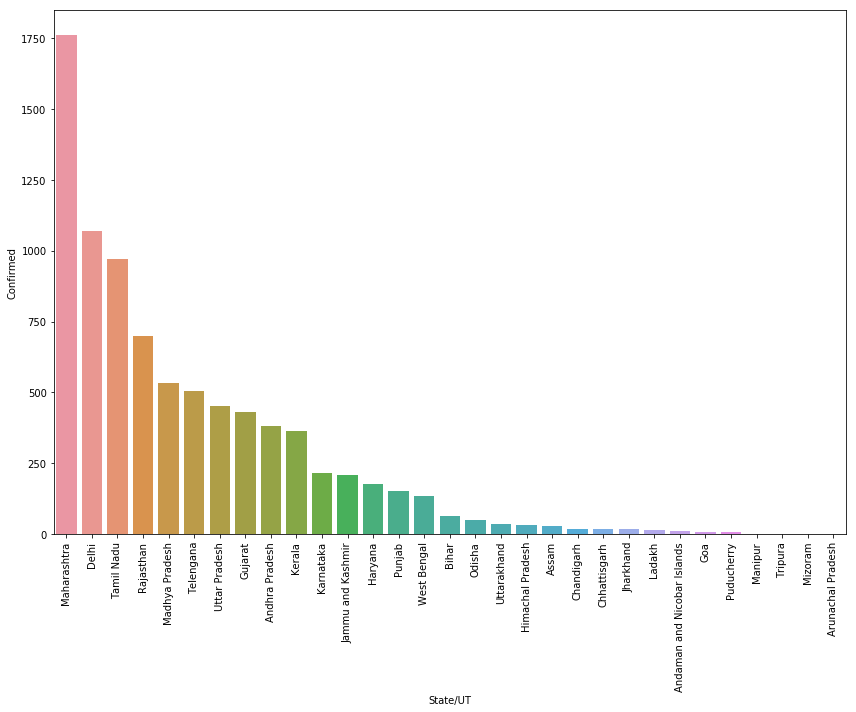

In [44]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Confirmed',data=current_covid_stats_sorted_conf)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbyconfirmedcases.png')

# States by active cases

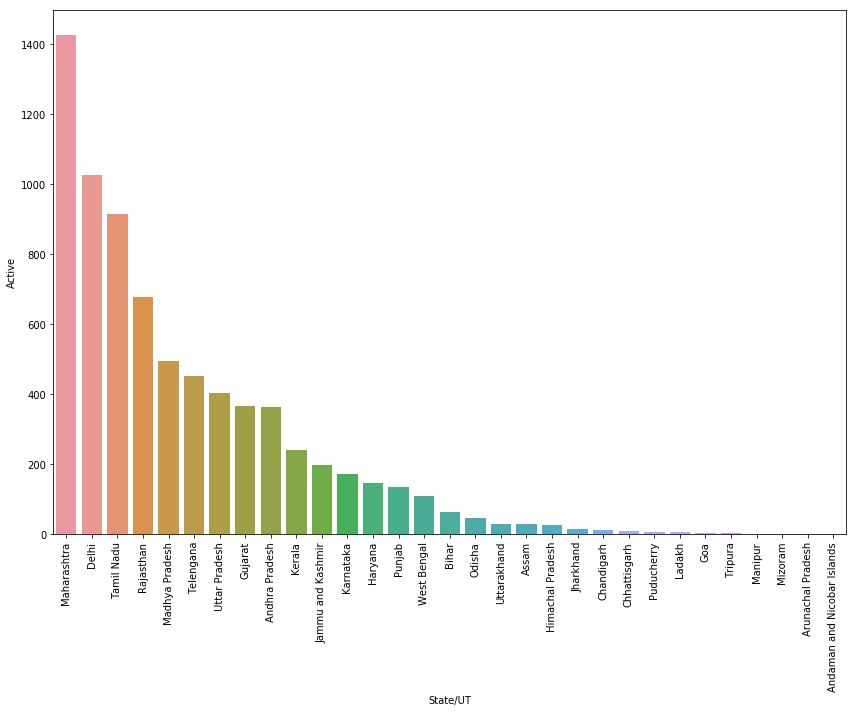

In [45]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Active',data=current_covid_stats_sorted_active)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbyactivecases.png')

# States by death cases

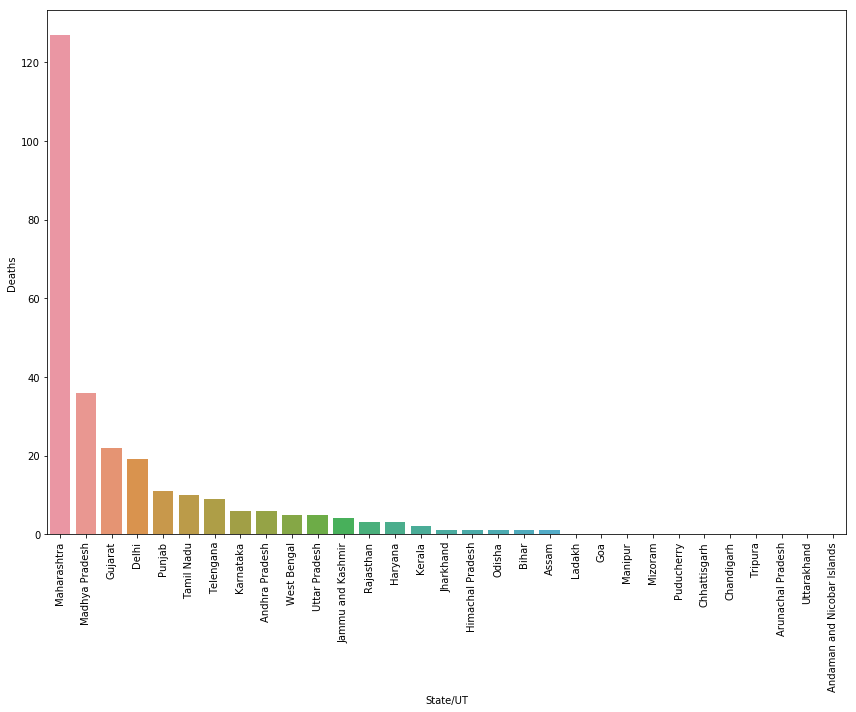

In [46]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Deaths',data=current_covid_stats_sorted_deaths)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbydeathcases.png')

 # States by cured cases

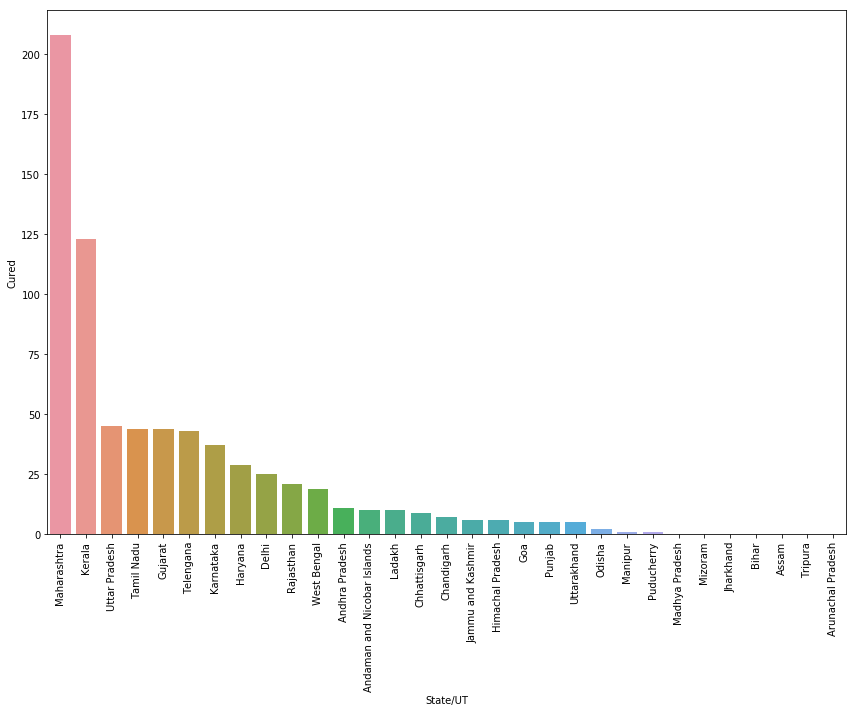

In [47]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Cured',data=current_covid_stats_sorted_cured)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbycuredcases.png')

 # States by recovery rate

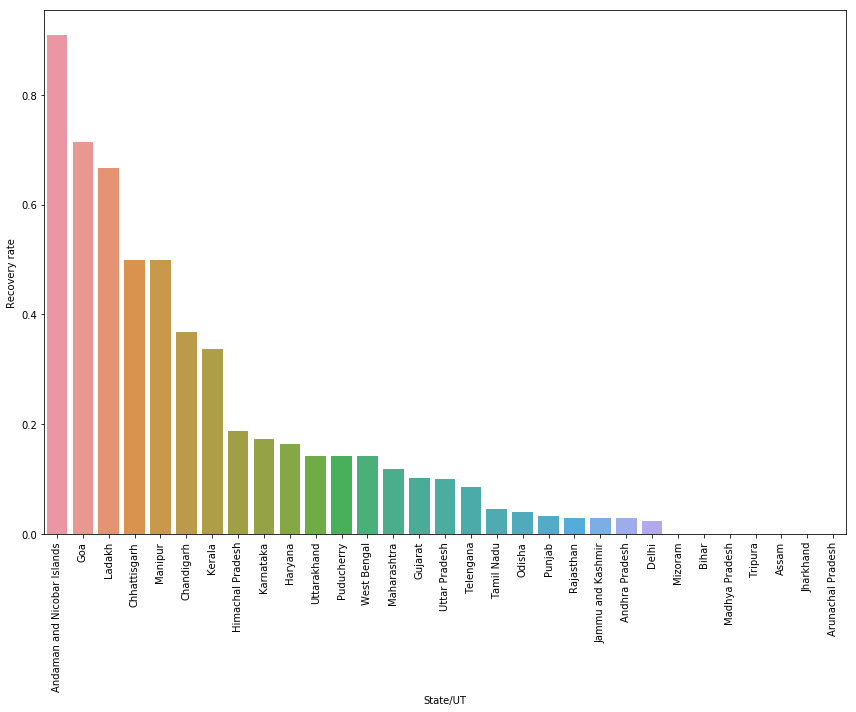

In [48]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Recovery rate',data=current_covid_stats_sorted_recovery)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbyrecoveryrate.png')

# States by mortality rate

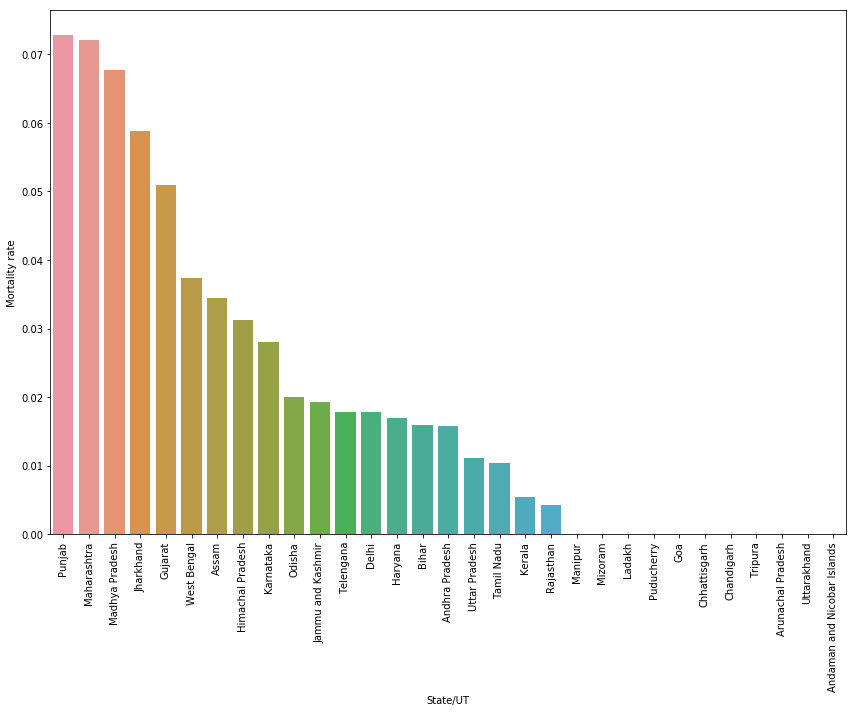

In [49]:
plt.figure(figsize=(12,10))
sns.barplot(x='State/UT',y='Mortality rate',data=current_covid_stats_sorted_mortality)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('images/statesbymortalityrate.png')

In [68]:
covid_overall = pd.read_csv('date_wise_data.csv')
covid_overall.drop('Unnamed: 0',axis = 1, inplace=True)
covid_overall['Date'] = pd.to_datetime(covid_overall['Date'])
covid_overall['Date'] = covid_overall['Date'].dt.strftime('%d/%m/%Y')
covid_overall.head()

,Date,Confirmed,Deaths,Cured,Active
0,30/01/2020,1,0,0,1
1,31/01/2020,1,0,0,1
2,01/02/2020,2,0,0,2
3,02/02/2020,3,0,0,3
4,03/02/2020,3,0,0,3


# India Overall COVID stats trend over time

In [69]:
covid_overall = covid_overall.melt('Date', var_name='cols',  value_name='vals')

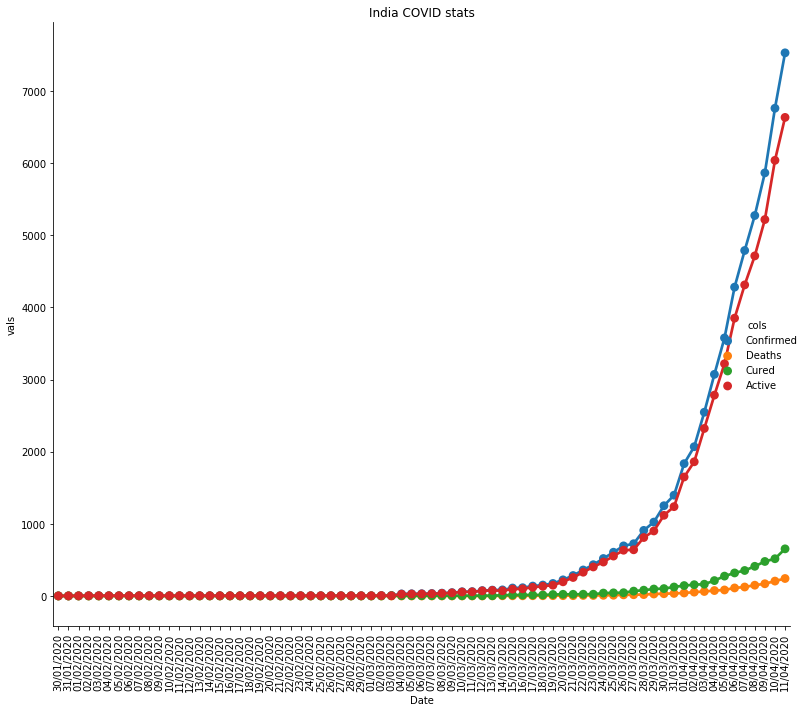

In [104]:
g = sns.catplot(x="Date", y="vals", hue='cols', data=covid_overall,height =10,kind='point')
plt.xticks(rotation=90)
plt.title('India COVID stats')
plt.tight_layout()
plt.savefig('images/India-covid-stats-trend.png')

In [79]:
covid_current_state_stats = pd.read_csv('state_wise_data.csv')
covid_current_state_stats.drop(['Date','Latitude','Longitude','Total Confirmed cases (Including 71 foreign Nationals) '],axis=1,inplace=True)
covid_current_state_stats = covid_current_state_stats.melt('Name of State / UT', var_name='cols',  value_name='vals')

# India COVID stats by state

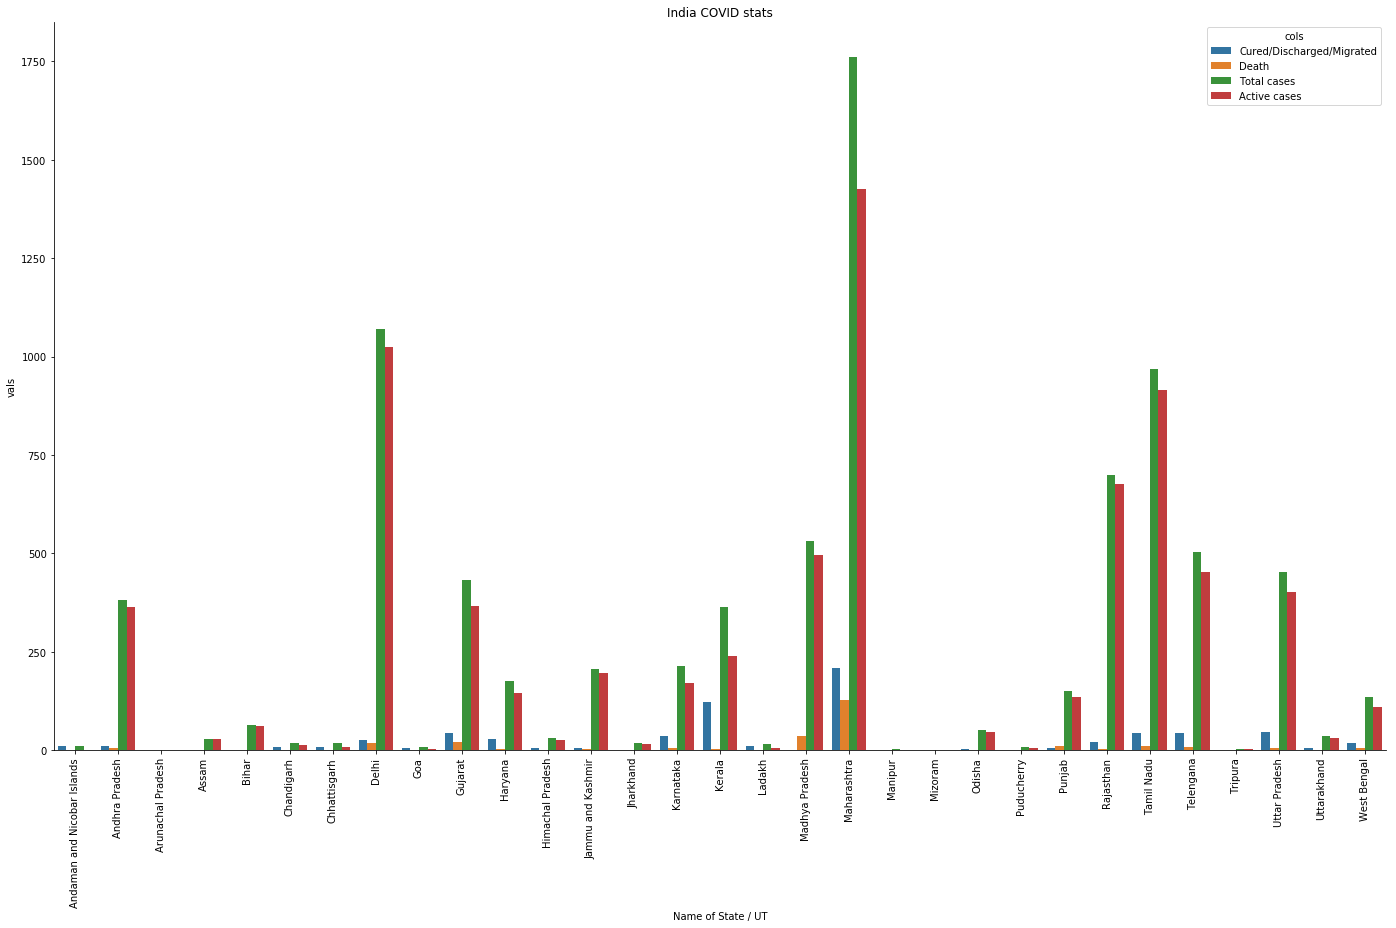

In [105]:
g = sns.catplot(x="Name of State / UT", y="vals", hue='cols', data=covid_current_state_stats,height =13,aspect=1.5,kind='bar',legend_out=False)
plt.xticks(rotation=90)
plt.title('India COVID stats')
plt.tight_layout()
plt.savefig('images/India-covid-current-stats.png')

In [102]:
covid_current_state_rates = pd.read_csv('statewise_data_with_new_cases.csv')
covid_current_state_rates.drop(['Unnamed: 0','Date','Latitude','Longitude','Confirmed','Active','Deaths','Cured','New cases'],axis=1,inplace=True)
covid_current_state_rates = covid_current_state_rates.melt('State/UT', var_name='cols',  value_name='vals')

# India COVID mortality and recovery rate by states

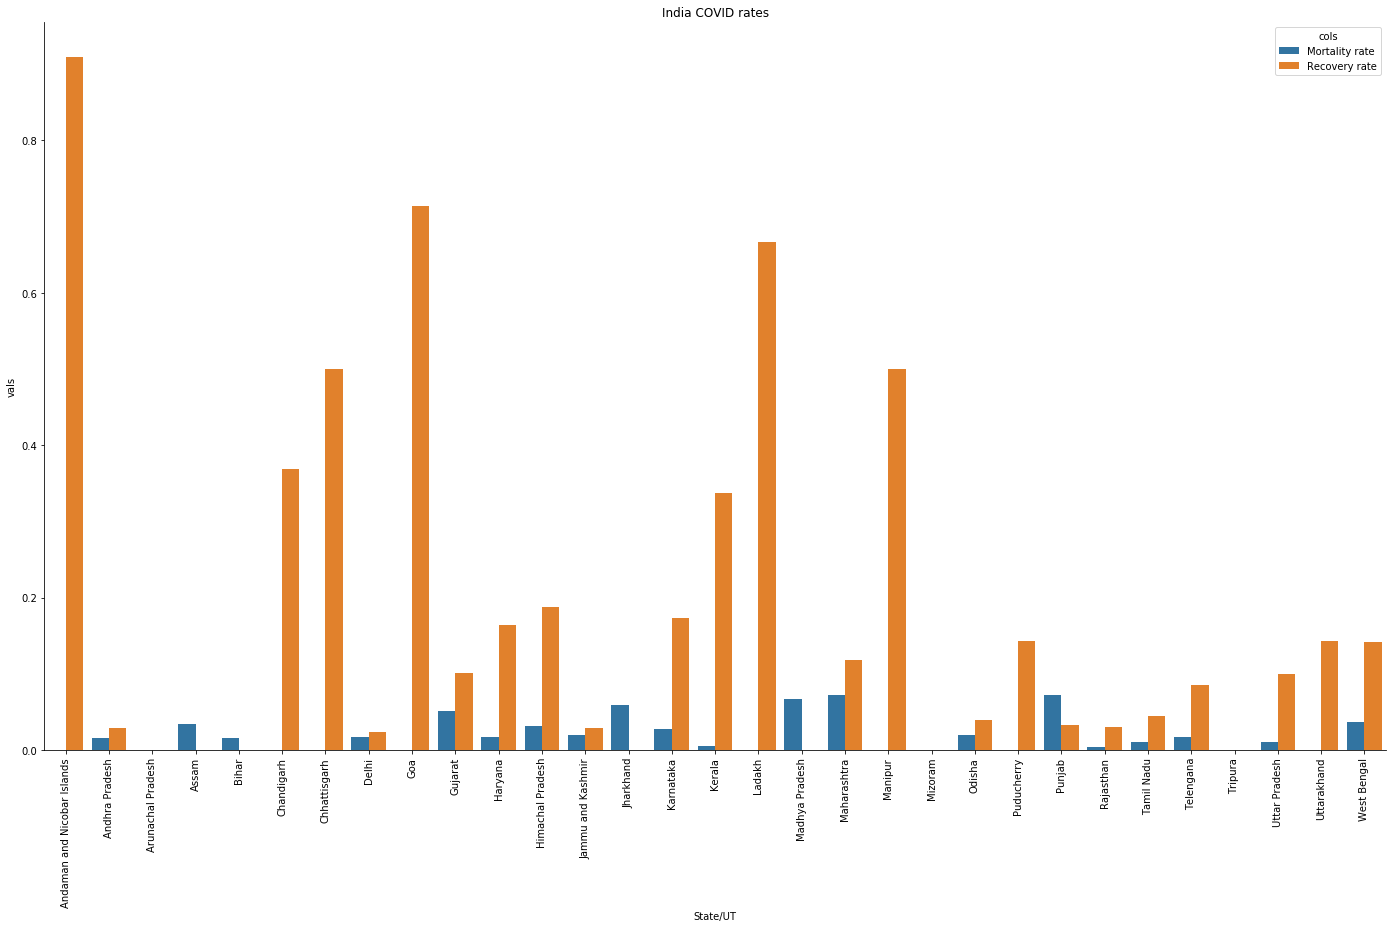

In [106]:
g = sns.catplot(x="State/UT", y="vals", hue='cols', data=covid_current_state_rates,height =13,aspect=1.5,kind='bar',legend_out=False)
plt.xticks(rotation=90)
plt.title('India COVID rates')
plt.tight_layout()
plt.savefig('images/India-covid-current-rates.png')